In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing libraries

In [2]:
pip install dataframe_image

     |████████████████████████████████| 1.1 MB 19.3 MB/s 
     |████████████████████████████████| 271 kB 72.5 MB/s 
     |████████████████████████████████| 94 kB 2.6 MB/s 
     |████████████████████████████████| 144 kB 62.4 MB/s 


In [3]:
# time calculation to track some processes
import time

# numeric and matrix operations
import numpy as np
import pandas as pd

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

import folium 
import plotly.express as px
import plotly.figure_factory as ff


import dataframe_image as dfi

# python core library for machine learning and data science
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 


# Clustering for FAOSTAT emissions

In [4]:
Emisiones_final = pd.read_csv ("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/DATASETS FINALES/Emisiones_final.csv", index_col = 0)

In [5]:
Emisiones_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509598 entries, 0 to 509597
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Country        509598 non-null  object 
 1   Country Group  509598 non-null  object 
 2   Item           509598 non-null  object 
 3   Element        509598 non-null  object 
 4   Year           509598 non-null  int64  
 5   Unit           509598 non-null  object 
 6   Value          509598 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 31.1+ MB


In [6]:
Emisiones_final.head()

,Country,Country Group,Item,Element,Year,Unit,Value
0,Afghanistan,Asia,Enteric Fermentation,Emissions (CH4),2010,kilotonnes,401.068
1,Afghanistan,Southern Asia,Enteric Fermentation,Emissions (CH4),2010,kilotonnes,401.068
2,Afghanistan,Asia,Enteric Fermentation,Emissions (CH4),2011,kilotonnes,402.513
3,Afghanistan,Southern Asia,Enteric Fermentation,Emissions (CH4),2011,kilotonnes,402.513
4,Afghanistan,Asia,Enteric Fermentation,Emissions (CH4),2012,kilotonnes,396.921


In [7]:
Emisiones_final["Year"].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [8]:
Emisiones_final = Emisiones_final[Emisiones_final["Year"] < 2029].reset_index(drop = True)

In [9]:
Emisiones_final_2019 = Emisiones_final[Emisiones_final["Year"] == 2019].reset_index(drop = True)

In [10]:
Emisiones_final["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, mainland', 'China, Taiwan Province of', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo',

In [11]:
Emisiones_final["Country"].nunique()

234

In [12]:
Emisiones_final["Country Group"].unique()

array(['Asia', 'Southern Asia', 'Europe', 'Southern Europe', 'Africa',
       'Northern Africa', 'Oceania', 'Middle Africa', 'Americas',
       'Caribbean', 'Small Island Developing States', 'South America',
       'Western Asia', 'Australia and New Zealand', 'Western Europe',
       'Eastern Europe', 'Central America', 'Western Africa',
       'Southern Africa', 'South-eastern Asia', 'Eastern Africa',
       'Northern America', 'Eastern Asia', 'Polynesia', 'Northern Europe',
       'Melanesia', 'Central Asia', 'Micronesia'], dtype=object)

In [13]:
Emisiones_final["Country Group"].nunique()

28

In [14]:
Emisiones_final = Emisiones_final[Emisiones_final["Value"] > 0].reset_index(drop = True)

In [15]:
 Emisiones_final.groupby(["Country Group"])["Value"].sum()

Country Group
Africa                            2.279624e+08
Americas                          3.027681e+08
Asia                              4.785006e+08
Australia and New Zealand         2.305585e+07
Caribbean                         3.219690e+06
Central America                   2.075903e+07
Central Asia                      8.801945e+06
Eastern Africa                    6.295750e+07
Eastern Asia                      1.636160e+08
Eastern Europe                    3.268454e+07
Europe                            8.482700e+07
Melanesia                         6.121495e+06
Micronesia                        1.282228e+04
Middle Africa                     9.415350e+07
Northern Africa                   1.940582e+07
Northern America                  6.540075e+07
Northern Europe                   1.705532e+07
Oceania                           2.924034e+07
Polynesia                         5.617831e+04
Small Island Developing States    1.342466e+07
South America                     2.131344e+08

In [16]:
Emisiones_final["Element"].unique()

array(['Emissions (CH4)', 'Emissions (CO2eq) from CH4 (AR5)',
       'Emissions (CO2eq) (AR5)', 'Emissions (N2O)',
       'Emissions (CO2eq) from N2O (AR5)', 'Direct emissions (N2O)',
       'Indirect emissions (N2O)', 'Emissions (CO2)'], dtype=object)

In [17]:
Emisiones_final.groupby("Element")["Value"].sum()

Element
Direct emissions (N2O)              6.711026e+05
Emissions (CH4)                     1.563768e+07
Emissions (CO2)                     4.177007e+08
Emissions (CO2eq) (AR5)             1.106845e+09
Emissions (CO2eq) from CH4 (AR5)    4.378550e+08
Emissions (CO2eq) from N2O (AR5)    2.797312e+08
Emissions (N2O)                     1.055590e+06
Indirect emissions (N2O)            2.000706e+05
Name: Value, dtype: float64

In [18]:
Emisiones_final_2019 = Emisiones_final[Emisiones_final["Element"] == "Emissions (CO2eq) (AR5)"].reset_index(drop = True)

In [19]:
Emisiones_final["Item"].unique()

array(['Enteric Fermentation', 'Manure Management', 'Rice Cultivation',
       'Synthetic Fertilizers', 'Manure applied to Soils',
       'Manure left on Pasture', 'Crop Residues',
       'Burning - Crop residues', 'Forestland', 'Savanna fires',
       'On-farm energy use', 'IPCC Agriculture', 'Agricultural Soils',
       'LULUCF', 'AFOLU', 'Emissions on agricultural land',
       'Farm-gate emissions', 'Drained organic soils',
       'Drained organic soils (CO2)', 'Drained organic soils (N2O)',
       'Forest fires', 'Net Forest conversion', 'Land Use change',
       'Fires in humid tropical forests', 'Fires in organic soils'],
      dtype=object)

In [20]:
Emisiones_final.groupby("Item")["Value"].sum()

Item
AFOLU                              3.600312e+08
Agricultural Soils                 8.157773e+07
Burning - Crop residues            1.702756e+06
Crop Residues                      8.436129e+06
Drained organic soils              1.653057e+07
Drained organic soils (CO2)        2.871667e+07
Drained organic soils (N2O)        4.352666e+06
Emissions on agricultural land     4.624316e+08
Enteric Fermentation               1.190187e+08
Farm-gate emissions                3.205632e+08
Fires in humid tropical forests    3.929232e+06
Fires in organic soils             1.040295e+07
Forest fires                       5.929308e+06
Forestland                         3.691922e+06
IPCC Agriculture                   2.642287e+08
LULUCF                             1.400876e+08
Land Use change                    1.418685e+08
Manure Management                  1.836967e+07
Manure applied to Soils            7.565580e+06
Manure left on Pasture             3.107025e+07
Net Forest conversion              

In [21]:
Emisiones_final_2019 =  Emisiones_final_2019[(Emisiones_final_2019["Item"] == "Farm-gate emissions") | (Emisiones_final_2019["Item"] == "Land Use change") ].reset_index(drop = True)

In [22]:
Emisiones_final["Country"].nunique()

229

In [23]:
Emisiones_final["Unit"].unique()

array(['kilotonnes'], dtype=object)

In [24]:
Emisiones_final_2019_cluster = Emisiones_final_2019.groupby(Emisiones_final_2019["Country"]).agg(
    total_emissions = ("Value", "sum"),
)

In [25]:
Emisiones_final_2019.groupby(Emisiones_final_2019.index).agg(
    total_emissions = ("Value", "sum"),
)

,total_emissions
0,17067.2222
1,17067.2222
2,17234.3359
3,17234.3359
4,17056.0280
...,...
7362,7.6911
7363,7.6911
7364,7.6911
7365,7.6911


In [26]:
Emisiones_final_2019_cluster .head()

,total_emissions
Country,
Afghanistan,332664.5360
Albania,72548.9968
Algeria,257688.8186
American Samoa,89.1298
Andorra,201.7263


In [27]:
Emisiones_final_2019_cluster .to_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/DATASETS FINALES/Emisiones_final_2019_cluster ")

# Adding new data and creating new features. 



## Adding Population

In [28]:
Emisiones_final_2019_cluster .head()

,total_emissions
Country,
Afghanistan,332664.5360
Albania,72548.9968
Algeria,257688.8186
American Samoa,89.1298
Andorra,201.7263


In [29]:
Poblacion_final = pd.read_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/DATASETS FINALES/Poblacion_final.csv",sep=",", encoding = "ISO-8859-1", index_col = 0)

In [30]:
Poblacion_final.head(10)

,Country,Country Group,Item,Element,Year,Unit,Value
0,Afghanistan,Asia,Population - Est. & Proj.,Total Population - Both sexes,2010,1000 persons,29185.507
1,Afghanistan,Asia,Population - Est. & Proj.,Total Population - Both sexes,2011,1000 persons,30117.413
2,Afghanistan,Asia,Population - Est. & Proj.,Total Population - Both sexes,2012,1000 persons,31161.376
3,Afghanistan,Asia,Population - Est. & Proj.,Total Population - Both sexes,2013,1000 persons,32269.589
4,Afghanistan,Asia,Population - Est. & Proj.,Total Population - Both sexes,2014,1000 persons,33370.794
5,Afghanistan,Asia,Population - Est. & Proj.,Total Population - Both sexes,2015,1000 persons,34413.603
6,Afghanistan,Asia,Population - Est. & Proj.,Total Population - Both sexes,2016,1000 persons,35383.032
7,Afghanistan,Asia,Population - Est. & Proj.,Total Population - Both sexes,2017,1000 persons,36296.113
8,Afghanistan,Asia,Population - Est. & Proj.,Total Population - Both sexes,2018,1000 persons,37171.921
9,Afghanistan,Asia,Population - Est. & Proj.,Total Population - Both sexes,2019,1000 persons,38041.754


In [31]:
Poblacion_final = Poblacion_final[Poblacion_final["Year"] == 2019].reset_index(drop = True)

In [32]:
Poblacion_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        198 non-null    object 
 1   Country Group  198 non-null    object 
 2   Item           198 non-null    object 
 3   Element        198 non-null    object 
 4   Year           198 non-null    int64  
 5   Unit           198 non-null    object 
 6   Value          198 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 11.0+ KB


In [33]:
Poblacion_final["Country"].nunique()

198

In [34]:
Emisiones_final_2019_cluster = Emisiones_final_2019_cluster .merge(Poblacion_final, how = "right", on = "Country")

In [35]:
Emisiones_final_2019_cluster.head()

,Country,total_emissions,Country Group,Item,Element,Year,Unit,Value
0,Afghanistan,3.326645e+05,Asia,Population - Est. & Proj.,Total Population - Both sexes,2019,1000 persons,38041.754
1,Albania,7.254900e+04,Europe,Population - Est. & Proj.,Total Population - Both sexes,2019,1000 persons,2880.917
2,Algeria,2.576888e+05,Africa,Population - Est. & Proj.,Total Population - Both sexes,2019,1000 persons,43053.054
3,Angola,1.657945e+06,Africa,Population - Est. & Proj.,Total Population - Both sexes,2019,1000 persons,31825.295
4,Antigua and Barbuda,8.139984e+02,Americas,Population - Est. & Proj.,Total Population - Both sexes,2019,1000 persons,97.118


In [36]:
Emisiones_final_2019_cluster = Emisiones_final_2019_cluster [["Country", "Country Group", "total_emissions", "Value"]]

In [37]:
Emisiones_final_2019_cluster.head()

,Country,Country Group,total_emissions,Value
0,Afghanistan,Asia,3.326645e+05,38041.754
1,Albania,Europe,7.254900e+04,2880.917
2,Algeria,Africa,2.576888e+05,43053.054
3,Angola,Africa,1.657945e+06,31825.295
4,Antigua and Barbuda,Americas,8.139984e+02,97.118


In [38]:
Emisiones_final_2019_cluster.isnull().sum()

Country            0
Country Group      0
total_emissions    3
Value              0
dtype: int64

In [39]:
Emisiones_final_2019_cluster["total_population"] = Emisiones_final_2019_cluster["Value"] 

In [40]:
Emisiones_final_2019_cluster.drop("Value", axis = 1, inplace = True)

In [41]:
Emisiones_final_2019_cluster.tail(10)

,Country,Country Group,total_emissions,total_population
188,United Kingdom of Great Britain and Northern I...,Europe,1.113037e+06,67530.172
189,United Republic of Tanzania,Africa,2.371497e+06,58005.463
190,United States of America,Americas,9.928668e+06,329064.917
191,Uruguay,Americas,5.834968e+05,3461.734
192,Uzbekistan,Asia,7.012077e+05,32981.716
193,Vanuatu,Oceania,1.530273e+04,299.882
194,Venezuela (Bolivarian Republic of),Americas,2.440284e+06,28515.829
195,Yemen,Asia,NaN,29161.922
196,Zambia,Africa,NaN,17861.030
197,Zimbabwe,Africa,NaN,14645.468


In [42]:
Emisiones_final_2019_cluster["Country"].nunique()

198

In [43]:
Emisiones_final_2019_cluster.to_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/DATASETS FINALES/Emisiones_final_2019_cluster")

In [44]:
Emisiones_final_2019_cluster.head()

,Country,Country Group,total_emissions,total_population
0,Afghanistan,Asia,3.326645e+05,38041.754
1,Albania,Europe,7.254900e+04,2880.917
2,Algeria,Africa,2.576888e+05,43053.054
3,Angola,Africa,1.657945e+06,31825.295
4,Antigua and Barbuda,Americas,8.139984e+02,97.118


In [45]:
Emisiones_final_2019_cluster = Emisiones_final_2019_cluster.iloc[::2].reset_index(drop = True)

### New features


In [46]:
Emisiones_final_2019_cluster = pd.read_csv ("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/DATASETS FINALES/Emisiones_final_2019_cluster",sep=",", encoding = "ISO-8859-1", index_col = 0)

In [47]:
Emisiones_final_2019_cluster.head()

,Country,Country Group,total_emissions,total_population
0,Afghanistan,Asia,3.326645e+05,38041.754
1,Albania,Europe,7.254900e+04,2880.917
2,Algeria,Africa,2.576888e+05,43053.054
3,Angola,Africa,1.657945e+06,31825.295
4,Antigua and Barbuda,Americas,8.139984e+02,97.118


In [48]:
Emisiones_final_2019_cluster["%_population"] = (Emisiones_final_2019_cluster["total_population"] / Emisiones_final_2019_cluster["total_population"].sum()) 

In [49]:
43053.054	 / Emisiones_final_2019_cluster["total_population"].sum()

0.004743495953759285

In [50]:
Emisiones_final_2019_cluster = Emisiones_final_2019_cluster[["Country", 'total_emissions', "total_population", "%_population"]]

In [51]:
Emisiones_final_2019_cluster.head()

,Country,total_emissions,total_population,%_population
0,Afghanistan,3.326645e+05,38041.754,0.004191
1,Albania,7.254900e+04,2880.917,0.000317
2,Algeria,2.576888e+05,43053.054,0.004743
3,Angola,1.657945e+06,31825.295,0.003506
4,Antigua and Barbuda,8.139984e+02,97.118,0.000011


In [52]:
Emisiones_final_2019_cluster.to_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/DATASETS FINALES/Emisiones_final_2019_cluster")

In [53]:
Emisiones_final_2019_cluster["%_emissions"] = (Emisiones_final_2019_cluster["total_emissions"] / Emisiones_final_2019_cluster["total_emissions"].sum()) 

In [54]:
Emisiones_final_2019_cluster["total_emissions"].sum()

227230515.3213

In [55]:
Emisiones_final_2019_cluster.head()

,Country,total_emissions,total_population,%_population,%_emissions
0,Afghanistan,3.326645e+05,38041.754,0.004191,0.001464
1,Albania,7.254900e+04,2880.917,0.000317,0.000319
2,Algeria,2.576888e+05,43053.054,0.004743,0.001134
3,Angola,1.657945e+06,31825.295,0.003506,0.007296
4,Antigua and Barbuda,8.139984e+02,97.118,0.000011,0.000004


## Adding GDP

In [56]:
GDP = pd.read_csv ("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/GDP_2019.csv",sep=",", encoding = "ISO-8859-1")

In [57]:
GDP.head()

,ï»¿Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,MK,Macro Indicators,2,Afghanistan,6110,Value US$,22008,Gross Domestic Product,2019,2019,millions,17876.546427,X,International reliable sources,NaN
1,MK,Macro Indicators,3,Albania,6110,Value US$,22008,Gross Domestic Product,2019,2019,millions,15278.072762,X,International reliable sources,NaN
2,MK,Macro Indicators,4,Algeria,6110,Value US$,22008,Gross Domestic Product,2019,2019,millions,171157.863119,X,International reliable sources,NaN
3,MK,Macro Indicators,6,Andorra,6110,Value US$,22008,Gross Domestic Product,2019,2019,millions,3154.137481,X,International reliable sources,NaN
4,MK,Macro Indicators,7,Angola,6110,Value US$,22008,Gross Domestic Product,2019,2019,millions,85000.612455,X,International reliable sources,NaN


In [58]:
GDP["Area"].replace("CÃ´te d'Ivoire", "Cote d'Ivoire")

0                             Afghanistan
1                                 Albania
2                                 Algeria
3                                 Andorra
4                                  Angola
                      ...                
206    Venezuela (Bolivarian Republic of)
207                              Viet Nam
208                                 Yemen
209                                Zambia
210                              Zimbabwe
Name: Area, Length: 211, dtype: object

In [59]:
GDP["Area"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, mainland', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "CÃ´te d'Ivoire", 'Croatia', 'Cuba', 'CuraÃ§ao',
       'Cyprus', 'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'E

In [60]:
GDP = GDP [[ "Area", "Value"]]

In [61]:
GDP["Country"] = GDP["Area"]

In [62]:
GDP["GDP_2019"] = GDP["Value"]

In [63]:
GDP.drop("Area", axis = 1, inplace = True)

In [64]:
GDP.drop("Value", axis = 1, inplace = True)

In [65]:
GDP = GDP [[ "Country", "GDP_2019"]]

In [66]:
GDP.head()

,Country,GDP_2019
0,Afghanistan,17876.546427
1,Albania,15278.072762
2,Algeria,171157.863119
3,Andorra,3154.137481
4,Angola,85000.612455


In [67]:
GDP["Country"].nunique()

211

In [68]:
Emisiones_final_2019_cluster["Country"].nunique()

198

In [69]:
Emisiones_final_2019_cluster = Emisiones_final_2019_cluster.merge(GDP, how= "left", on = 'Country')

In [70]:
Emisiones_final_2019_cluster.head()

,Country,total_emissions,total_population,%_population,%_emissions,GDP_2019
0,Afghanistan,3.326645e+05,38041.754,0.004191,0.001464,17876.546427
1,Albania,7.254900e+04,2880.917,0.000317,0.000319,15278.072762
2,Algeria,2.576888e+05,43053.054,0.004743,0.001134,171157.863119
3,Angola,1.657945e+06,31825.295,0.003506,0.007296,85000.612455
4,Antigua and Barbuda,8.139984e+02,97.118,0.000011,0.000004,1661.962963


### New features

In [71]:
Emisiones_final_2019_cluster["%_emissions"] = (Emisiones_final_2019_cluster["total_emissions"] / Emisiones_final_2019_cluster["total_emissions"].sum()) 

In [72]:
Emisiones_final_2019_cluster["emissions_per_capita"] = Emisiones_final_2019_cluster["total_emissions"] / Emisiones_final_2019_cluster["total_population"]

In [73]:
Emisiones_final_2019_cluster["emissions_per_capita_mundial"] = Emisiones_final_2019_cluster["total_emissions"] / Emisiones_final_2019_cluster["total_population"].sum()

In [74]:
Emisiones_final_2019_cluster["GDP19_per_capita"] = Emisiones_final_2019_cluster["GDP_2019"] / Emisiones_final_2019_cluster["total_population"]

In [75]:
Emisiones_final_2019_cluster["GDP19_per_capita_mundial"] = Emisiones_final_2019_cluster["GDP_2019"] / Emisiones_final_2019_cluster["total_population"].sum()

In [76]:
Emisiones_final_2019_cluster["emissions_per_GDP"] = Emisiones_final_2019_cluster["total_emissions"] / Emisiones_final_2019_cluster["GDP_2019"]

In [77]:
Emisiones_final_2019_cluster["emissions_per_GDP_mundial"] = Emisiones_final_2019_cluster["total_emissions"] / Emisiones_final_2019_cluster["GDP_2019"].sum()

In [78]:
Emisiones_final_2019_cluster.head()

,Country,total_emissions,total_population,%_population,%_emissions,GDP_2019,emissions_per_capita,emissions_per_capita_mundial,GDP19_per_capita,GDP19_per_capita_mundial,emissions_per_GDP,emissions_per_GDP_mundial
0,Afghanistan,3.326645e+05,38041.754,0.004191,0.001464,17876.546427,8.744721,0.036652,0.469919,0.001970,18.608993,0.003290
1,Albania,7.254900e+04,2880.917,0.000317,0.000319,15278.072762,25.182606,0.007993,5.303198,0.001683,4.748570,0.000717
2,Algeria,2.576888e+05,43053.054,0.004743,0.001134,171157.863119,5.985378,0.028392,3.975510,0.018858,1.505562,0.002548
3,Angola,1.657945e+06,31825.295,0.003506,0.007296,85000.612455,52.095210,0.182669,2.670851,0.009365,19.505100,0.016396
4,Antigua and Barbuda,8.139984e+02,97.118,0.000011,0.000004,1661.962963,8.381540,0.000090,17.112821,0.000183,0.489781,0.000008


## Adding Country Group

In [79]:
Country_Group = pd.read_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/Regiones_filtradas_final.csv", index_col = 0 )

In [80]:
Country_Group.head()

,Country Group,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina Faso


In [81]:
Cluster = Cluster.merge(Country_Group, how = "left", on = 'Country')

NameError: ignored

In [ ]:
Emisiones_final_2019_cluster = Emisiones_final_2019_cluster.merge(Country_Group, how = "left", on = 'Country')

In [ ]:
Emisiones_final_2019_cluster.isnull().sum()

In [ ]:
Emisiones_final_2019_cluster[Emisiones_final_2019_cluster["emissions_per_capita_mundial"].isnull()]

In [ ]:
Emisiones_final_2019_cluster.head()

In [ ]:
Emisiones_final_2019_cluster.to_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/CLUSTERING/Emisiones_final_2019_cluster.csv")

## Adding Production 

In [ ]:
Produccion_final = pd.read_csv ("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/DATASETS FINALES/Produccion_final.csv",sep=",", encoding = "ISO-8859-1", index_col = 0)

In [ ]:
Produccion_final.info()

In [ ]:
Produccion_final.isnull().sum()

In [ ]:
Produccion_final.head()

In [ ]:
Produccion_final = Produccion_final[Produccion_final["Year"] == 2019].reset_index(drop = True)

In [ ]:
Produccion_final.head(1)

In [ ]:
Produccion_final["Total Production"] = Produccion_final["Value"]

In [ ]:
Produccion_final = Produccion_final [["Country", "Total Production"]]

In [ ]:
Produccion_final = Produccion_final.groupby("Country")["Total Production"].sum().to_frame()

In [ ]:
Produccion_final.reset_index(inplace = True)

In [ ]:
Produccion_final.head()

In [ ]:
Produccion_final.info()

In [ ]:
Produccion_final.isnull().sum()

In [ ]:
Cluster.isnull().sum()

In [ ]:
Cluster = Cluster.merge(Produccion_final, how = "left", on = "Country" )

In [ ]:
Cluster.info()

In [ ]:
Cluster.drop("Total Production_y", axis =1, inplace = True)

In [ ]:
Cluster["Total Production"] = Cluster["Total Production_x"]

In [ ]:
Cluster.drop("Total Production_x", axis =1, inplace = True)

In [ ]:
Cluster.isnull().sum()

In [ ]:
Cluster.to_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/CLUSTERING/Cluster.csv")

## Additional new features

In [ ]:
Cluster["production_per_capita"] = Cluster["Total Production"] / Cluster["total_population"]

In [ ]:
Cluster["%_production_mundial"] = Cluster["Total Production"] / Cluster["total_population"].sum()

In [ ]:
Cluster["emissions_per_production"] = Cluster["total_emissions"] / Cluster["Total Production"]

In [ ]:
Cluster["emissions_per_production_mundial"] = Cluster["total_emissions"] / Cluster["Total Production"].sum()

In [ ]:
Cluster.info()

In [ ]:
Cluster.isnull().sum()

In [ ]:
Cluster.drop("emissions_annual_growth", axis = 1, inplace = True)

In [ ]:
Cluster[Cluster["Country"] == "China, mainland"]

In [ ]:
Cluster.drop(Cluster.index[Cluster['Country'] == "China, mainland"], inplace=True)

In [ ]:
Cluster.reset_index(drop = True, inplace = True)

In [ ]:
Cluster.to_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/CLUSTERING/Cluster.csv")

# Plotting with plotly express

### Histograms

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/SERIES TEMPORALES/df.csv", index_col = 0)

In [ ]:
Cluster = pd.read_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/CLUSTERING/Cluster.csv", index_col = 0)

In [ ]:
dfhist = Cluster[(Cluster["Country Group"] == "Africa") |
                             (Cluster["Country Group"] == "Asia") |
                             (Cluster["Country Group"] == "Americas") |
                             (Cluster["Country Group"] == "Europe") |
                             (Cluster["Country Group"] == "Oceania") ].reset_index(drop = True)

In [ ]:
px.histogram(dfhist, x ='Country Group', y= 'total_population',  color= 'Country Group', height =700)

In [ ]:
px.histogram(dfhist, x ='total_population', marginal='rug', hover_name ='Country', color= 'Country Group')

In [ ]:
px.bar(dfhist, x ='Country Group', y= 'total_population',  hover_name = 'Country', color= 'Country Group', height =700)

In [ ]:
px.bar(dfhist, x ='Country Group', y= 'total_population',  hover_name = 'Country', color= 'total_emissions', height =700)

In [ ]:
px.bar(dfhist, x ='Country Group', y= 'total_emissions',  hover_name = 'Country', color= 'GDP19_per_capita', height =700)

In [ ]:
px.bar(dfhist, x ='Country Group', y= 'GDP19_per_capita',  hover_name = 'Country', color= 'total_emissions', height =700)

In [ ]:
px.histogram(dfhist, x ='total_emissions', y = 'GDP19_per_capita', marginal='rug', hover_name ='Country', color= 'Country Group',height =700)

In [ ]:
px.histogram(dfhist, x ='GDP19_per_capita', y= 'total_population', marginal='rug', hover_name ='Country', color= 'Country Group')

### Scatters 

In [ ]:
Cluster = pd.read_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/CLUSTERING/Cluster.csv", index_col = 0)

In [ ]:
scatter_cluster = Cluster[(Cluster["Country Group"] == "Africa") |
                             (Cluster["Country Group"] == "Asia") |
                             (Cluster["Country Group"] == "Americas") |
                             (Cluster["Country Group"] == "Europe") |
                             (Cluster["Country Group"] == "Oceania") ].reset_index(drop = True)

In [ ]:
scatter_cluster[scatter_cluster["Country"] == "China, mainland"]

In [ ]:
scatter_cluster.drop(index=scatter_cluster.index[34], 
        axis=0, 
        inplace=True)

In [ ]:
scatter_cluster.head()

In [ ]:
px.scatter(scatter_cluster, x = "GDP19_per_capita", y= "total_emissions", size ="total_population", size_max = 65, color = "Country Group", log_x = True, hover_name = "Country", hover_data = scatter_cluster, height = 700 )

In [ ]:
px.scatter(scatter_cluster, x = "GDP19_per_capita", y= "total_emissions", size ="total_population", size_max = 65, color = "Country Group", log_x = True, hover_name = "Country", height = 700 )

### Sunburst

In [ ]:
dfhist = scatter_df

In [ ]:
dfhist.head(1)

In [ ]:
px.sunburst(dfhist, path=['Country Group', 'Country'], values ='Total Emissions', hover_name = 'Country', color = 'Country', height=900)

### Treemap

In [ ]:
px.treemap(dfhist, path=['Country Group', 'Country'], values = "GDP", hover_name = 'Country', color = 'Total Emissions', height=700)

In [ ]:
px.treemap(dfhist, path=['Country Group', 'Country'], values = "Population", hover_name = 'Country', color = 'Total Emissions', height=700)

In [ ]:
px.treemap(dfhist, path=['Country Group', 'Country'], values = "GDP_per capita", hover_name = 'Country', color = 'Total Emissions', height=700)

In [ ]:
px.treemap(dfhist, path=['Country Group', 'Country'], values = "Total Emissions", hover_name = 'Country', color = 'Total Emissions', height=700)

In [ ]:
Emisiones_final_2019_cluster.to_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/DATASETS FINALES/Emisiones_final_2019_cluster")

# Dataset preparation

In [ ]:
Cluster = pd.read_csv ("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/CLUSTERING/Cluster.csv", index_col = 0)

In [ ]:
Cluster.info()

In [ ]:
Cluster["Country Group"].unique()

#### Country Group by continent

In [ ]:
Cluster = Cluster.merge(Country_Group, how = "left", on = 'Country')

In [ ]:
Cluster.insert (1, "Country Group", Cluster["Country Group_y"])

In [ ]:
Cluster.drop("Country Group_y", axis = 1, inplace = True)

In [ ]:
 Cluster.iloc[::2]

In [ ]:
Cluster =  Cluster.iloc[::2].reset_index (drop = True, inplace = True)

In [ ]:
Cluster = Cluster[(Cluster['Country Group'] == "Africa") | (Cluster['Country Group'] == "Asia") | (Cluster['Country Group'] == "Americas") | (Cluster['Country Group'] == "Europe") | (Cluster['Country Group'] == "Oceania")].reset_index (drop = True, inplace = True)

In [ ]:
Cluster["Country Group"].unique()

In [ ]:
Cluster.head()

#### New features

- Annual CO2 growth.
- Annual CO2 per capita.
- Production per GDP.
- Production per GDP per capita.
- Annual consumption-based CO2 emissions.
- Carbon intensity.

In [ ]:
Annual_CO2_growth = pd.read_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/absolute-change-co2 (1).csv", sep=",", encoding = "ISO-8859-1")

In [ ]:
Annual_CO2_growth.info()

In [ ]:
Annual_CO2_growth = Annual_CO2_growth[Annual_CO2_growth["Year"] == 2019]

In [ ]:
Annual_CO2_growth["Country"] = Annual_CO2_growth["Entity"]

In [ ]:
Annual_CO2_growth = Annual_CO2_growth[["Country", "Annual CO2 emissions growth (abs)"]]

In [ ]:
Cluster = Cluster.merge(Annual_CO2_growth, how = "left", on = "Country")

In [ ]:
Cluster["emissions_growth_per_capita"] = Cluster["Annual CO2 emissions growth (abs)"] / Cluster["total_population"]

In [ ]:
Consumption_based_CO2emissions= pd.read_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/production-vs-consumption-co2-emissions (1).csv", sep=",", encoding = "ISO-8859-1")

In [ ]:
Consumption_based_CO2emissions.head()


In [ ]:
Consumption_based_CO2emissions["Country"] = Consumption_based_CO2emissions["Entity"]

In [ ]:
Consumption_based_CO2emissions = Consumption_based_CO2emissions[Consumption_based_CO2emissions["Year"] == 2019]

In [ ]:
Consumption_based_CO2emissions = Consumption_based_CO2emissions[["Country", "Annual consumption-based CO2 emissions"]]

In [ ]:
Cluster = Cluster.merge(Consumption_based_CO2emissions, how = "left", on = "Country")

In [ ]:
Cluster["consumption_CO2emissions_per_capita"] = Cluster["Annual consumption-based CO2 emissions"] / Cluster["total_population"]

In [ ]:
Cluster.info()

In [ ]:
Cluster["production_per_GDP"] = Cluster["Total Production"] / Cluster["GDP_2019"]

In [ ]:
Cluster["production_per_GDP_per_capita"] = Cluster["production_per_GDP"] / Cluster["total_population"]

In [ ]:
Cluster["emissions_per_GDP_per_capita"] = Cluster["emissions_per_GDP"] / Cluster["total_population"]

In [ ]:
Cluster["emissions_per_production_per_capita"] = Cluster["emissions_per_production"] / Cluster["total_population"]

Adding Carbon Intensity (CO2), amount of CO2 used by energy unit



In [ ]:
Carbon_Intensity = pd.read_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/CLUSTERING/co2-per-unit-energy.csv",sep=",", encoding = "ISO-8859-1")

In [ ]:
Carbon_Intensity["Country"] = Carbon_Intensity["Entity"]

In [ ]:
Carbon_Intensity.drop("Entity", axis = 1, inplace = True)

In [ ]:
Carbon_Intensity["CO2 per unit energy"] = Carbon_Intensity["Annual CO2 emissions per unit energy (kg per kilowatt-hour)"]

In [ ]:
Carbon_Intensity.drop("Annual CO2 emissions per unit energy (kg per kilowatt-hour)", axis = 1, inplace = True)

In [ ]:
Carbon_Intensity = Carbon_Intensity[Carbon_Intensity["Year"] == 2019]

In [ ]:
Carbon_Intensity = Carbon_Intensity[["Country", "CO2 per unit energy"]]

In [ ]:
Carbon_Intensity.reset_index(drop = True, inplace = True)

In [ ]:
Cluster = Cluster.merge(Carbon_Intensity, how = "left", on = "Country")

In [ ]:
Cluster["CO2_per_unit_enery_per_capita"] = Cluster["CO2 per unit energy"] / Cluster ["total_population"]

In [ ]:
Cluster.to_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/CLUSTERING/Cluster.csv")

#### Imputing nulls

In [83]:
Cluster = pd.read_csv ("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/CLUSTERING/Cluster.csv", index_col = 0)

In [84]:
Cluster.isnull().sum()

Country                                     0
total_emissions                             3
total_population                            0
%_population                                0
GDP_2019                                    7
%_GDP_2019                                  7
%_emissions                                 3
emissions_per_capita                        3
emissions_per_capita_mundial                3
GDP19_per_capita                            7
GDP19_per_capita_mundial                    7
emissions_per_GDP                          10
emissions_per_GDP_mundial                   3
production_per_capita                       3
%_production_mundial                        3
emissions_per_production                    6
emissions_per_production_mundial            3
Total Production                            3
Annual CO2 emissions growth (abs)          21
emissions_growth_per_capita                21
Annual consumption-based CO2 emissions     91
consumption_CO2emissions_per_capit

In [85]:
Cluster = Cluster.set_index(["Country"])

In [86]:
Cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, Afghanistan to Zimbabwe
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   total_emissions                         194 non-null    float64
 1   total_population                        197 non-null    float64
 2   %_population                            197 non-null    float64
 3   GDP_2019                                190 non-null    float64
 4   %_GDP_2019                              190 non-null    float64
 5   %_emissions                             194 non-null    float64
 6   emissions_per_capita                    194 non-null    float64
 7   emissions_per_capita_mundial            194 non-null    float64
 8   GDP19_per_capita                        190 non-null    float64
 9   GDP19_per_capita_mundial                190 non-null    float64
 10  emissions_per_GDP                       187 non-null

In [87]:
knn_imputer = KNNImputer()
df_imputed = knn_imputer.fit_transform(Cluster)

In [88]:
df_imputed = pd.DataFrame(df_imputed, index = Cluster.index, columns = Cluster.columns)

In [89]:
df_imputed.isnull().sum()

total_emissions                           0
total_population                          0
%_population                              0
GDP_2019                                  0
%_GDP_2019                                0
%_emissions                               0
emissions_per_capita                      0
emissions_per_capita_mundial              0
GDP19_per_capita                          0
GDP19_per_capita_mundial                  0
emissions_per_GDP                         0
emissions_per_GDP_mundial                 0
production_per_capita                     0
%_production_mundial                      0
emissions_per_production                  0
emissions_per_production_mundial          0
Total Production                          0
Annual CO2 emissions growth (abs)         0
emissions_growth_per_capita               0
Annual consumption-based CO2 emissions    0
consumption_CO2emissions_per_capita       0
production_per_GDP                        0
production_per_GDP_per_capita   



#### Outliers exploration 

In [90]:
df_imputed[df_imputed["total_emissions"] > 400000]

,total_emissions,total_population,%_population,GDP_2019,%_GDP_2019,%_emissions,emissions_per_capita,emissions_per_capita_mundial,GDP19_per_capita,GDP19_per_capita_mundial,...,Annual CO2 emissions growth (abs),emissions_growth_per_capita,Annual consumption-based CO2 emissions,consumption_CO2emissions_per_capita,production_per_GDP,production_per_GDP_per_capita,emissions_per_GDP_per_capita,emissions_per_production_per_capita,CO2 per unit energy,CO2_per_unit_enery_per_capita
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,4.147543e+05,44780.677,0.004934,4.496635e+05,0.004447,0.018221,9.261904,0.045697,10.041463,0.049543,...,-13534040.0,-302.229464,1.665991e+08,3720.335133,1030.411378,0.023010,2.059741e-05,1.998950e-08,0.17420,3.890071e-06
Brazil,2.432079e+06,211049.527,0.023253,1.847796e+06,0.018274,0.106846,11.523738,0.267961,8.755271,0.203586,...,2107858.0,9.987504,5.039806e+08,2387.973053,1332.753095,0.006315,6.236478e-06,4.679395e-09,0.14100,6.680896e-07
China,1.583607e+06,1465634.161,0.161481,1.476250e+07,0.145995,0.069571,1.080493,0.174479,10.072434,1.626502,...,199999030.0,136.459040,9.442835e+09,6442.832122,285.403659,0.000195,7.319170e-08,2.564498e-10,0.26650,1.818326e-07
Democratic Republic of the Congo,1.303446e+06,86790.567,0.009562,4.731962e+04,0.000468,0.057263,15.018290,0.143611,0.545216,0.005214,...,-5672282.4,55.313478,3.487187e+08,4146.416113,2507.472672,0.028891,3.173797e-04,1.265736e-07,0.21784,5.131098e-06
India,1.537299e+06,1366417.754,0.150549,2.891582e+06,0.028596,0.067537,1.125058,0.169376,2.116177,0.318589,...,26162431.0,19.146729,2.410473e+09,1764.081796,974.342241,0.000713,3.890803e-07,3.993261e-10,0.27760,2.031590e-07
Indonesia,2.298101e+06,270625.568,0.029817,1.119191e+06,0.011068,0.100960,8.491812,0.253200,4.135569,0.123310,...,45709708.0,168.903878,6.733582e+08,2488.154336,892.802285,0.003299,7.587457e-06,8.498474e-09,0.26690,9.862335e-07
Myanmar,4.082009e+05,54045.420,0.005955,7.678453e+04,0.000759,0.017933,7.552924,0.044975,1.420741,0.008460,...,3367315.0,62.305280,2.963827e+08,7527.149536,2057.029546,0.038061,9.836517e-05,4.781904e-08,0.20422,5.250443e-06
Pakistan,4.242045e+05,216565.318,0.023861,2.569963e+05,0.002542,0.018636,1.958783,0.046738,1.186692,0.028315,...,-4016908.0,-18.548252,2.395949e+08,1106.339898,1617.171690,0.007467,7.621833e-06,4.713063e-09,0.23690,1.093896e-06
United States of America,1.072814e+06,329064.917,0.036256,2.143323e+07,0.211965,0.047131,3.260191,0.118200,65.133732,2.361468,...,14835938.2,142.555724,8.071062e+08,2879.629375,84.584807,0.000257,1.521092e-07,1.798304e-09,0.20678,1.649901e-06


The outlier countries are:

- Brasil.
- China.
- China mainland.
- Democratic Republic of Congo.
- India.
- Indonesia.
- Estados Unidos.

In [91]:
df_imputed.reset_index(inplace = True)

In [92]:
df_imputed[df_imputed["Country"] == "China, mainland"]

,Country,total_emissions,total_population,%_population,GDP_2019,%_GDP_2019,%_emissions,emissions_per_capita,emissions_per_capita_mundial,GDP19_per_capita,...,Annual CO2 emissions growth (abs),emissions_growth_per_capita,Annual consumption-based CO2 emissions,consumption_CO2emissions_per_capita,production_per_GDP,production_per_GDP_per_capita,emissions_per_GDP_per_capita,emissions_per_production_per_capita,CO2 per unit energy,CO2_per_unit_enery_per_capita


In [93]:
df_imputed.drop([37], axis = 0, inplace = True)

In [94]:
df_imputed[df_imputed["Country"] == "Faroe Islands"]

,Country,total_emissions,total_population,%_population,GDP_2019,%_GDP_2019,%_emissions,emissions_per_capita,emissions_per_capita_mundial,GDP19_per_capita,...,Annual CO2 emissions growth (abs),emissions_growth_per_capita,Annual consumption-based CO2 emissions,consumption_CO2emissions_per_capita,production_per_GDP,production_per_GDP_per_capita,emissions_per_GDP_per_capita,emissions_per_production_per_capita,CO2 per unit energy,CO2_per_unit_enery_per_capita
62,Faroe Islands,812.3252,48.678,0.000005,661.761041,0.000007,0.000036,16.687728,0.00009,15.053708,...,40795.6,165.243836,4.841524e+07,18272.9204,55.849609,4.226352,0.012643,0.003713,0.1439,0.000147


In [95]:
df_imputed.drop([63], axis = 0, inplace = True)

In [96]:
df_imputed[df_imputed["Country"] == "China, mainland"]

,Country,total_emissions,total_population,%_population,GDP_2019,%_GDP_2019,%_emissions,emissions_per_capita,emissions_per_capita_mundial,GDP19_per_capita,...,Annual CO2 emissions growth (abs),emissions_growth_per_capita,Annual consumption-based CO2 emissions,consumption_CO2emissions_per_capita,production_per_GDP,production_per_GDP_per_capita,emissions_per_GDP_per_capita,emissions_per_production_per_capita,CO2 per unit energy,CO2_per_unit_enery_per_capita


In [97]:
df_imputed.reset_index(inplace = True)

In [98]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   index                                   195 non-null    int64  
 1   Country                                 195 non-null    object 
 2   total_emissions                         195 non-null    float64
 3   total_population                        195 non-null    float64
 4   %_population                            195 non-null    float64
 5   GDP_2019                                195 non-null    float64
 6   %_GDP_2019                              195 non-null    float64
 7   %_emissions                             195 non-null    float64
 8   emissions_per_capita                    195 non-null    float64
 9   emissions_per_capita_mundial            195 non-null    float64
 10  GDP19_per_capita                        195 non-null    float6

In [104]:
df_imputed = df_imputed.set_index(["Country"])

#### Feature scaling

In [100]:
df_imputed.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   index                                   195 non-null    int64  
 1   Country                                 195 non-null    object 
 2   total_emissions                         195 non-null    float64
 3   total_population                        195 non-null    float64
 4   %_population                            195 non-null    float64
 5   GDP_2019                                195 non-null    float64
 6   %_GDP_2019                              195 non-null    float64
 7   %_emissions                             195 non-null    float64
 8   emissions_per_capita                    195 non-null    float64
 9   emissions_per_capita_mundial            195 non-null    float64
 10  GDP19_per_capita                        195 non-null    float6

In [105]:
# Escalado de datos con outliers
standard_scaler = StandardScaler()
scaled_df = standard_scaler.fit_transform(df_imputed)
scaled_df = pd.DataFrame(scaled_df, index = df_imputed.index, columns = df_imputed.columns)

# Elbow calculation

In [106]:
scaled_df.reset_index(inplace = True)

In [107]:
scaled_df.drop([62], axis=0, inplace=True)

In [108]:
scaled_df.set_index("Country", inplace = True)

In [109]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, Afghanistan to Zimbabwe
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   index                                   194 non-null    float64
 1   total_emissions                         194 non-null    float64
 2   total_population                        194 non-null    float64
 3   %_population                            194 non-null    float64
 4   GDP_2019                                194 non-null    float64
 5   %_GDP_2019                              194 non-null    float64
 6   %_emissions                             194 non-null    float64
 7   emissions_per_capita                    194 non-null    float64
 8   emissions_per_capita_mundial            194 non-null    float64
 9   GDP19_per_capita                        194 non-null    float64
 10  GDP19_per_capita_mundial                194 non-null

In [110]:
#1 
scaled_df_capita = scaled_df[["emissions_per_capita","emissions_per_capita_mundial", "GDP19_per_capita", "GDP19_per_capita_mundial", "production_per_capita", "emissions_per_production", "consumption_CO2emissions_per_capita" ]]
#2 (añadirle el CO2 unit per energy per capita)
#scaled_df_capita = scaled_df[["emissions_per_capita","emissions_per_capita_mundial", "GDP19_per_capita", "GDP19_per_capita_mundial", "production_per_capita", "emissions_per_production", "consumption_CO2emissions_per_capita", "CO2_per_unit_enery_per_capita" ]]


In [111]:
scaled_df_capita.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, Afghanistan to Zimbabwe
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   emissions_per_capita                 194 non-null    float64
 1   emissions_per_capita_mundial         194 non-null    float64
 2   GDP19_per_capita                     194 non-null    float64
 3   GDP19_per_capita_mundial             194 non-null    float64
 4   production_per_capita                194 non-null    float64
 5   emissions_per_production             194 non-null    float64
 6   consumption_CO2emissions_per_capita  194 non-null    float64
dtypes: float64(7)
memory usage: 12.1+ KB


In [112]:
CALCULATE_ELBOW = True

if CALCULATE_ELBOW:
    st = time.time()

    sse = {}

    for k in range(2, 20):

        print(f"Fitting pipe with {k} clusters")
        cluster_model = KMeans(n_clusters = k)
        cluster_model.fit(scaled_df_capita)
        

        sse[k] = cluster_model.inertia_

    et = time.time()
    print("Elbow curve took {} minutes.".format(round((et - st)/60), 2))

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters
Fitting pipe with 15 clusters
Fitting pipe with 16 clusters
Fitting pipe with 17 clusters
Fitting pipe with 18 clusters
Fitting pipe with 19 clusters
Elbow curve took 0 minutes.


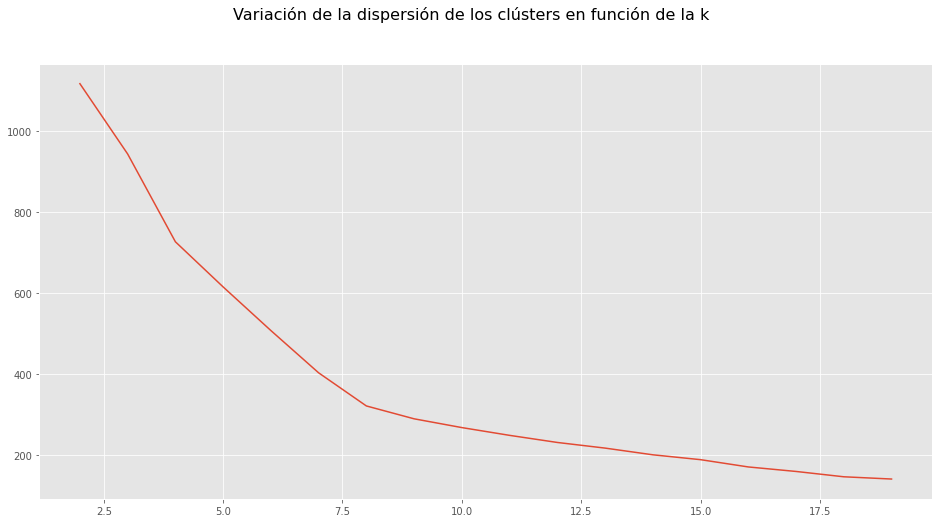

In [113]:
if CALCULATE_ELBOW:
    fig = plt.figure(figsize = (16, 8))
    ax = fig.add_subplot()

    x_values = list(sse.keys())
    y_values = list(sse.values())

    ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
    fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16)

    plt.savefig('plot_elbow')

# Dendrograms

In [114]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, Afghanistan to Zimbabwe
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   index                                   194 non-null    float64
 1   total_emissions                         194 non-null    float64
 2   total_population                        194 non-null    float64
 3   %_population                            194 non-null    float64
 4   GDP_2019                                194 non-null    float64
 5   %_GDP_2019                              194 non-null    float64
 6   %_emissions                             194 non-null    float64
 7   emissions_per_capita                    194 non-null    float64
 8   emissions_per_capita_mundial            194 non-null    float64
 9   GDP19_per_capita                        194 non-null    float64
 10  GDP19_per_capita_mundial                194 non-null

### "total_emissions" and "GDP_2019"

In [115]:
#scaled_df

X = scaled_df.loc[:, ["total_emissions","GDP_2019"]].values

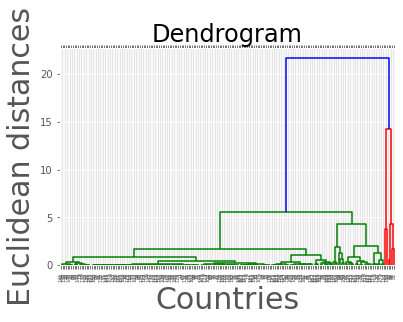

In [116]:
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.rcParams["figure.figsize"] = [30, 10]
plt.rcParams["figure.autolayout"] = True
plt.title('Dendrogram', fontsize=24)
plt.xlabel('Countries', fontsize=30)
plt.ylabel('Euclidean distances', fontsize=30)
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')

plt.savefig('plot12')

plt.show()





In [117]:

# There are two algorithms for hierarchical clustering: #Agglomerative Hierarchical Clustering and 
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our algorithm class

ac = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')

In [118]:
# Lets try to fit the hierarchical clustering algorithm  to dataset 
#X while creating the clusters vector that tells for each customer 
#which cluster the customer belongs to.
y_ac=ac.fit_predict(X)

In [119]:
print(ac.labels_)

[1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 4 1 1 1 1 1 1 1 0 1 0 1 2 1 1
 0 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 3 4 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 2 1 1 1 0 1 1 1]


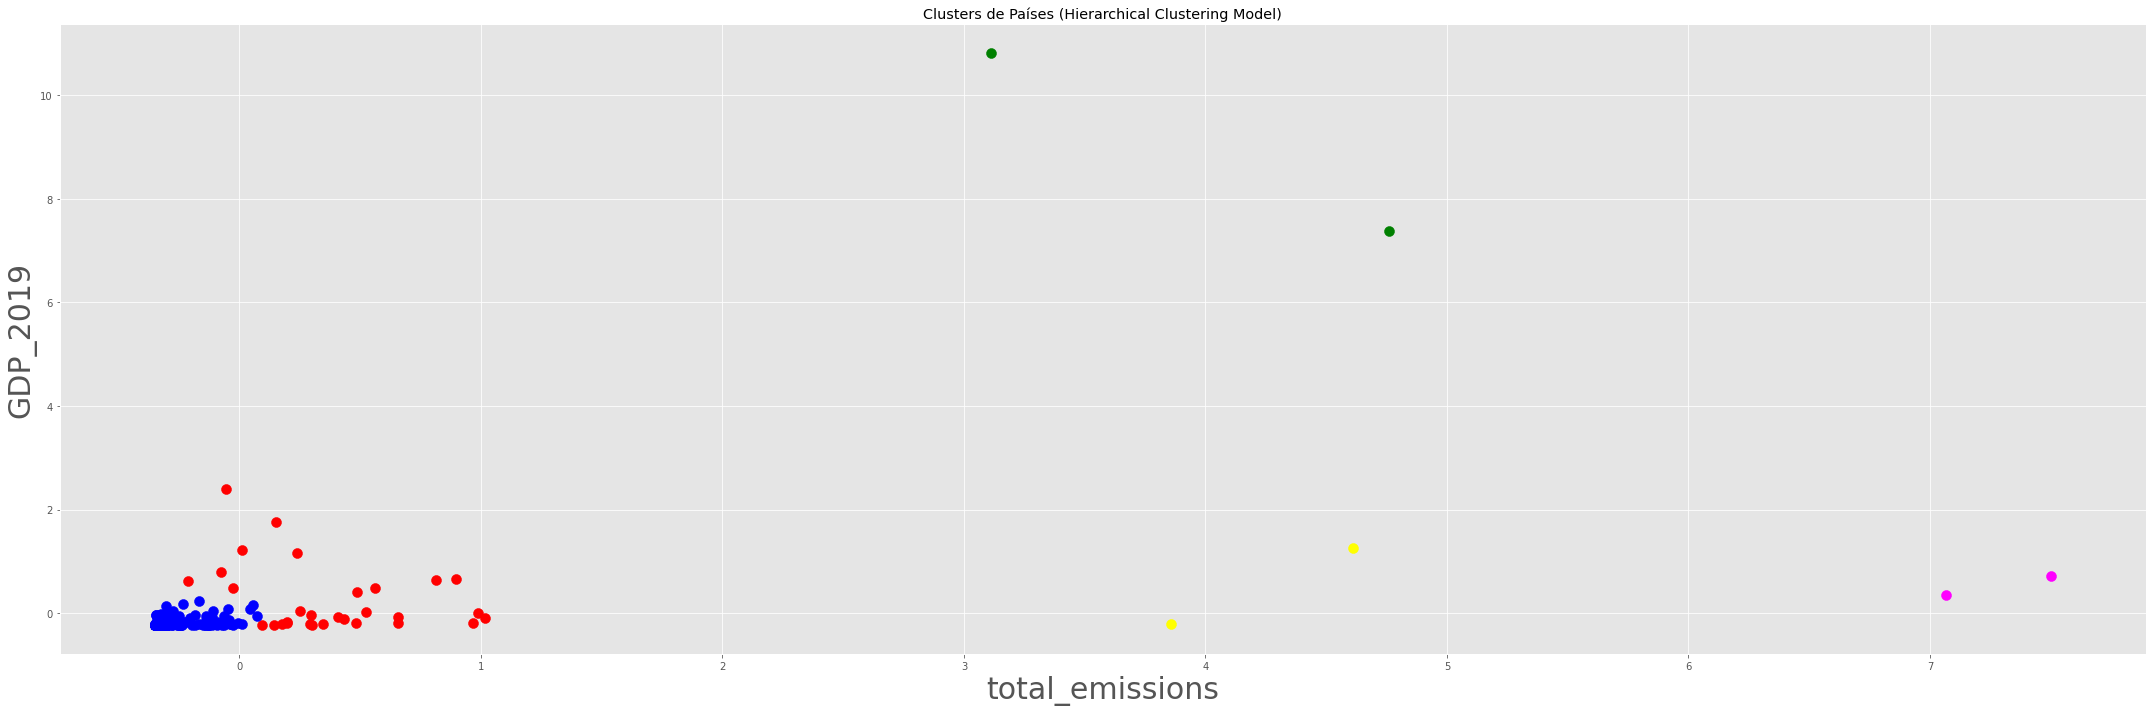

In [120]:
#Visualizing clusters

plt.scatter(X[y_ac==0, 0], X[y_ac==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_ac==1, 0], X[y_ac==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_ac==2, 0], X[y_ac==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_ac==3, 0], X[y_ac==3, 1], s=100, c='yellow', label ='Cluster 4')
plt.scatter(X[y_ac==4, 0], X[y_ac==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Clusters de Países (Hierarchical Clustering Model)')
plt.xlabel('total_emissions', fontsize=30)
plt.ylabel("GDP_2019", fontsize=30)

plt.savefig('plot13')

plt.show()

### "total_emissions" and "GDP_per_capita"

In [121]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, Afghanistan to Zimbabwe
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   index                                   194 non-null    float64
 1   total_emissions                         194 non-null    float64
 2   total_population                        194 non-null    float64
 3   %_population                            194 non-null    float64
 4   GDP_2019                                194 non-null    float64
 5   %_GDP_2019                              194 non-null    float64
 6   %_emissions                             194 non-null    float64
 7   emissions_per_capita                    194 non-null    float64
 8   emissions_per_capita_mundial            194 non-null    float64
 9   GDP19_per_capita                        194 non-null    float64
 10  GDP19_per_capita_mundial                194 non-null

In [122]:
#scaled_df

X = scaled_df.loc[:, ["total_emissions","GDP19_per_capita"]].values

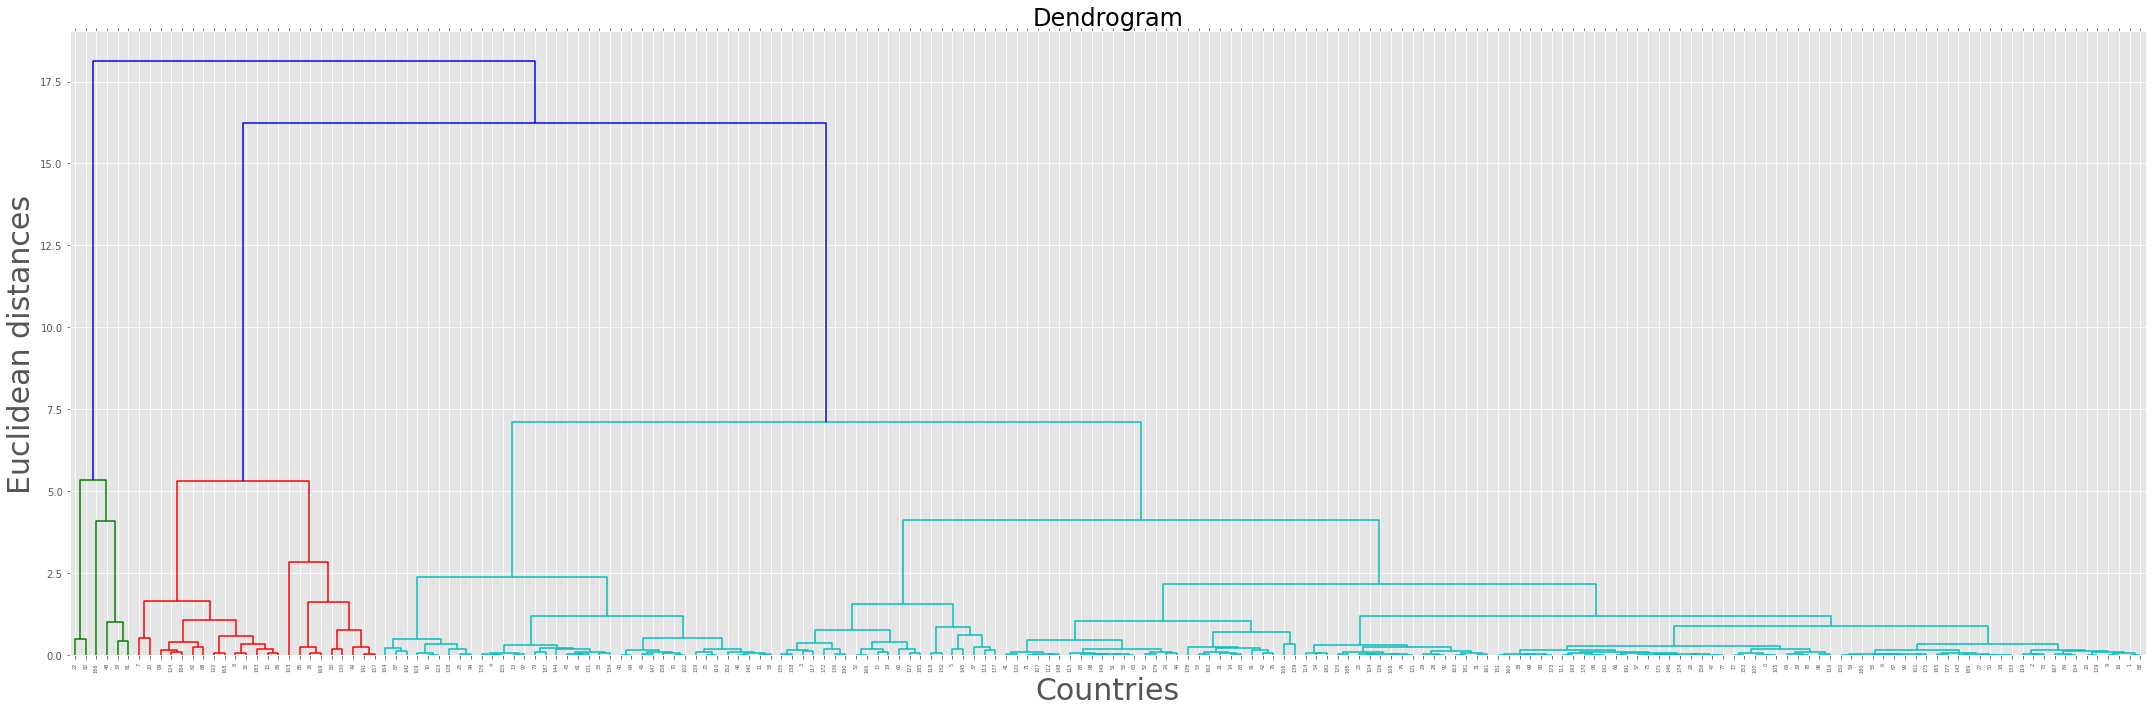

In [123]:
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.rcParams["figure.figsize"] = [30, 10]
plt.rcParams["figure.autolayout"] = True
plt.title('Dendrogram', fontsize=24)
plt.xlabel('Countries', fontsize=30)
plt.ylabel('Euclidean distances', fontsize=30)
#fig.suptitle('test title', fontsize=20)

plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')

plt.savefig('plot22')

plt.show()





In [124]:

# There are two algorithms for hierarchical clustering: #Agglomerative Hierarchical Clustering and 
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our algorithm class
ac = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage ='ward')

In [125]:
# Lets try to fit the hierarchical clustering algorithm  to dataset #X while creating the clusters vector that tells for each customer #which cluster the customer belongs to.
y_ac=ac.fit_predict(X)

In [126]:
print(ac.labels_)

[2 2 2 6 3 6 2 5 5 2 3 3 6 3 2 5 2 2 2 6 2 2 4 3 2 2 2 2 2 2 5 2 6 3 0 5 1
 6 2 2 3 2 2 3 2 3 3 2 0 1 2 2 2 2 2 2 2 2 3 2 6 3 5 2 3 2 2 2 5 2 3 2 3 2
 2 2 2 2 2 3 1 0 4 2 2 1 5 3 2 5 2 2 2 2 3 2 2 3 2 2 2 2 3 1 2 2 2 2 2 3 3
 2 2 6 2 2 2 6 6 2 2 2 5 3 5 2 2 6 3 2 1 3 6 2 3 6 6 6 6 2 3 1 3 2 3 6 2 3
 2 2 2 2 3 2 2 3 2 1 3 3 2 2 2 2 3 2 6 2 5 1 2 2 6 2 2 2 3 2 2 2 2 2 2 5 5
 6 0 3 2 2 6 2 2 2]


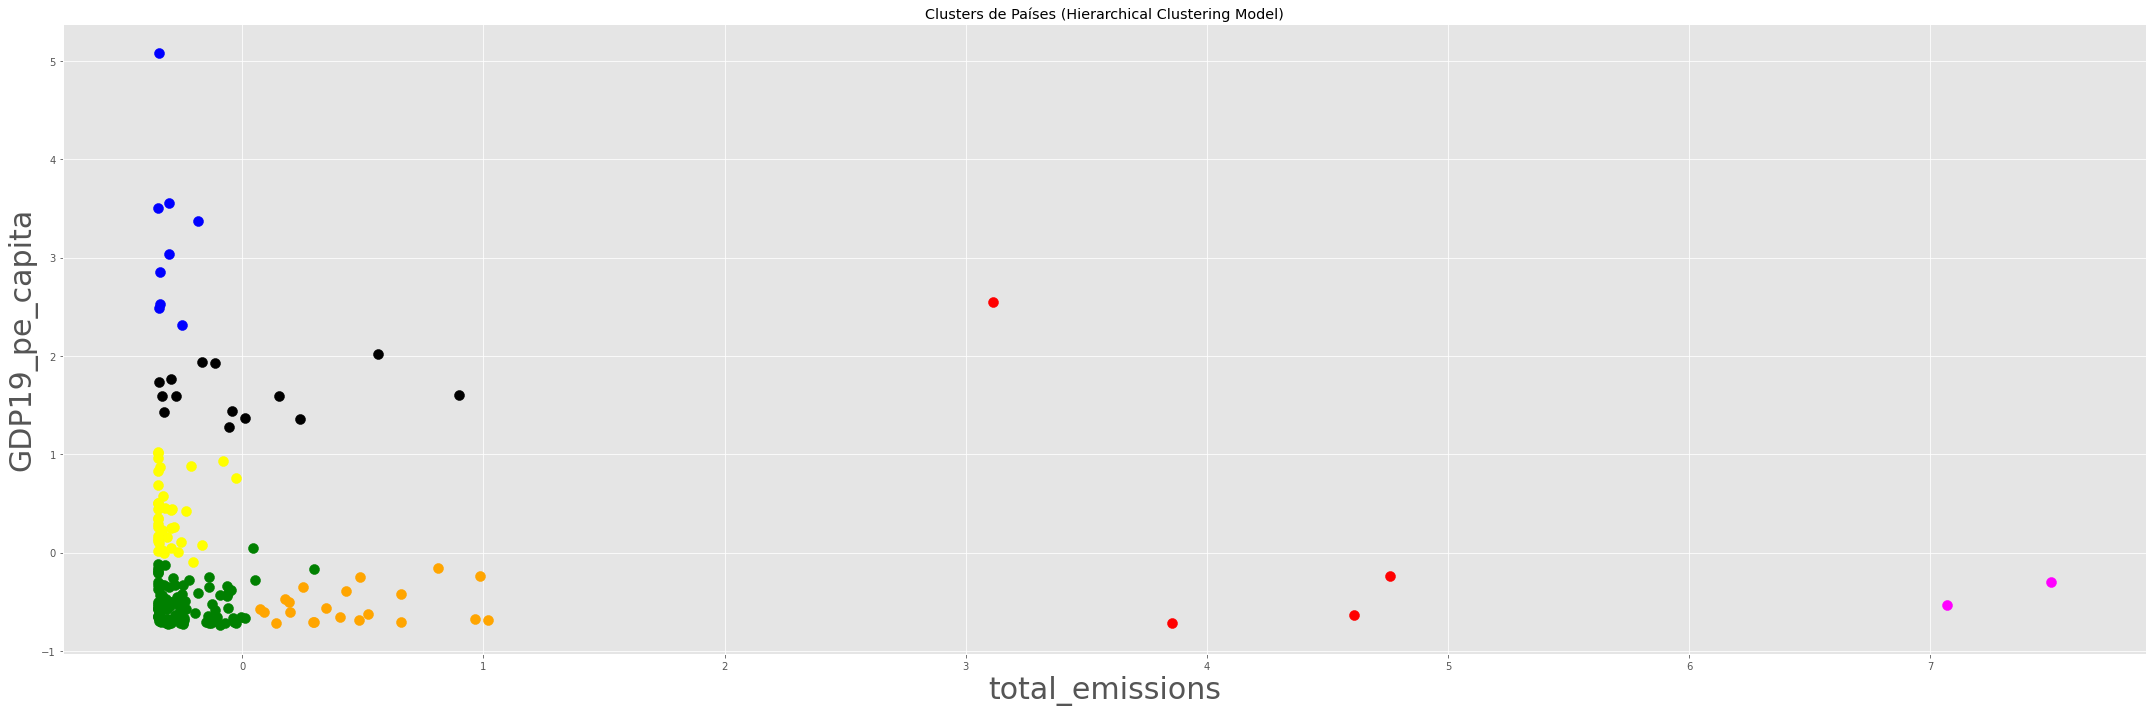

In [127]:
#Visualizing clusters
plt.scatter(X[y_ac==0, 0], X[y_ac==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_ac==1, 0], X[y_ac==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_ac==2, 0], X[y_ac==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_ac==3, 0], X[y_ac==3, 1], s=100, c='yellow', label ='Cluster 4')
plt.scatter(X[y_ac==4, 0], X[y_ac==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(X[y_ac==5, 0], X[y_ac==5, 1], s=100, c='black', label ='Cluster 6')
plt.scatter(X[y_ac==6, 0], X[y_ac==6, 1], s=100, c='orange', label ='Cluster 7')
plt.title('Clusters de Países (Hierarchical Clustering Model)')
plt.xlabel('total_emissions', fontsize=30)
plt.ylabel("GDP19_pe_capita", fontsize=30)

plt.savefig('plot24')

plt.show()

In [128]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, Afghanistan to Zimbabwe
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   index                                   194 non-null    float64
 1   total_emissions                         194 non-null    float64
 2   total_population                        194 non-null    float64
 3   %_population                            194 non-null    float64
 4   GDP_2019                                194 non-null    float64
 5   %_GDP_2019                              194 non-null    float64
 6   %_emissions                             194 non-null    float64
 7   emissions_per_capita                    194 non-null    float64
 8   emissions_per_capita_mundial            194 non-null    float64
 9   GDP19_per_capita                        194 non-null    float64
 10  GDP19_per_capita_mundial                194 non-null

In [129]:
scaled_df[scaled_df["total_emissions"] > 2]

,index,total_emissions,total_population,%_population,GDP_2019,%_GDP_2019,%_emissions,emissions_per_capita,emissions_per_capita_mundial,GDP19_per_capita,...,Annual CO2 emissions growth (abs),emissions_growth_per_capita,Annual consumption-based CO2 emissions,consumption_CO2emissions_per_capita,production_per_GDP,production_per_GDP_per_capita,emissions_per_GDP_per_capita,emissions_per_production_per_capita,CO2 per unit energy,CO2_per_unit_enery_per_capita
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,-1.343509,7.500197,1.164836,1.164836,0.722391,0.722391,7.500197,0.833065,7.500197,-0.300513,...,0.076109,-0.099063,0.494277,-0.843274,0.603235,-0.279918,-0.282391,-0.121443,-1.058107,-1.008776
China,-1.132741,4.761102,9.662057,9.662057,7.383035,7.383035,4.761102,-0.457115,4.761102,-0.234067,...,12.285511,0.001584,13.149532,-0.280734,-0.483336,-0.283348,-0.283885,-0.121459,1.937841,-1.016069
Democratic Republic of the Congo,-0.869282,3.856667,0.323238,0.323238,-0.206189,-0.206189,3.856667,1.264789,3.856667,-0.714675,...,-0.403907,-0.062992,0.274464,-0.599321,1.821945,-0.267265,-0.206928,-0.121003,0.776225,-0.941840
India,-0.254543,4.611606,8.990070,8.990070,1.260714,1.260714,4.611606,-0.451609,4.611606,-0.635427,...,1.560217,-0.091774,3.193409,-0.929827,0.231402,-0.283058,-0.283809,-0.121459,2.202822,-1.015749
Indonesia,-0.236979,7.067680,1.568341,1.568341,0.346619,0.346619,7.067680,0.458495,7.067680,-0.533557,...,2.766237,0.027403,0.734075,-0.829375,0.146809,-0.281608,-0.282063,-0.121430,1.947390,-1.004004
United States of America,1.589675,3.112127,1.964147,1.964147,10.823400,10.823400,3.112127,-0.187830,3.112127,2.543545,...,0.861400,0.006435,0.923430,-0.775065,-0.691675,-0.283313,-0.283866,-0.121454,0.512200,-0.994051


### "total_emissions" and "emissions_per_GDP"

In [130]:
#scaled_df

X = scaled_df.loc[:, ["total_emissions","emissions_per_GDP"]].values

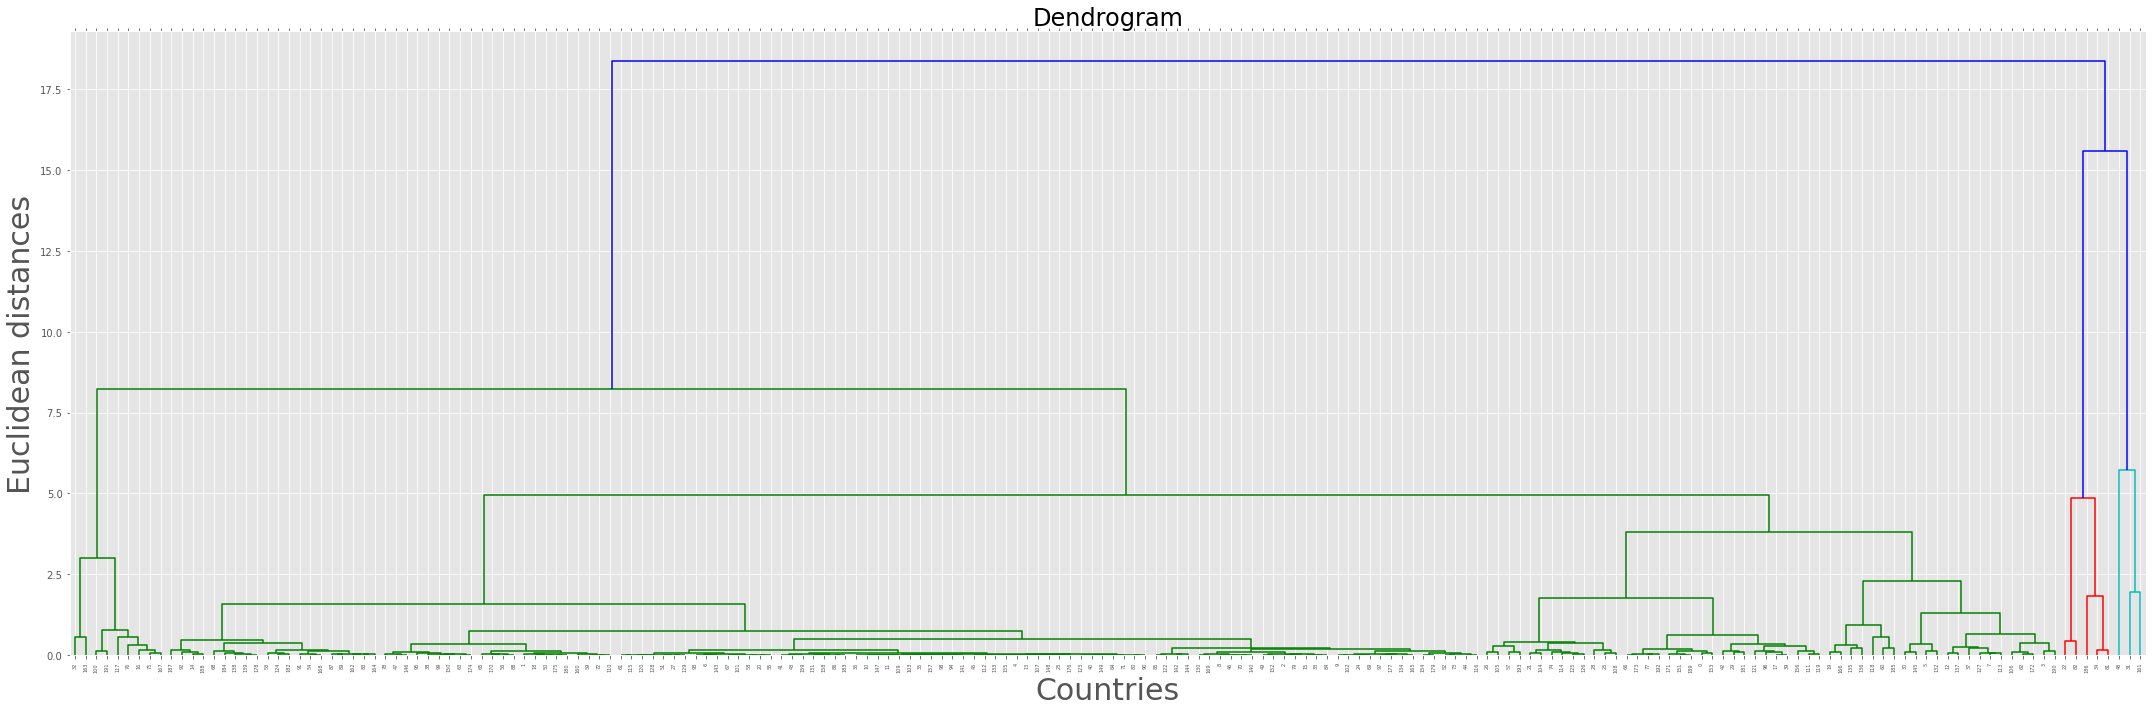

In [131]:
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.rcParams["figure.figsize"] = [30, 10]
plt.rcParams["figure.autolayout"] = True
plt.title('Dendrogram', fontsize=24)
plt.xlabel('Countries', fontsize=30)
plt.ylabel('Euclidean distances', fontsize=30)
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')

plt.savefig('plot32')

plt.show()





In [132]:

# There are two algorithms for hierarchical clustering: #Agglomerative Hierarchical Clustering and 
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our algorithm class
ac = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage ='ward')

In [133]:
# Lets try to fit the hierarchical clustering algorithm  to dataset #X while creating the clusters vector that tells for each customer #which cluster the customer belongs to.
y_ac=ac.fit_predict(X)

In [134]:
print(ac.labels_)

[7 5 5 1 5 1 5 1 5 5 5 5 1 5 5 5 0 7 5 1 5 7 6 5 5 7 7 5 7 7 1 3 0 5 2 5 5
 1 5 7 5 5 7 5 5 5 5 5 4 5 5 5 5 5 5 5 5 7 5 5 1 5 1 5 5 5 7 5 5 5 5 5 5 5
 7 0 0 7 5 5 5 2 6 5 5 5 5 5 5 5 5 5 5 5 5 5 7 5 5 5 0 5 5 5 7 7 1 5 7 5 5
 7 5 1 7 5 5 0 1 7 5 7 5 5 5 7 7 1 5 5 5 5 1 5 5 1 1 1 5 5 5 5 5 5 5 1 5 5
 5 5 5 7 5 7 5 5 7 5 5 5 5 3 5 0 5 5 1 0 5 5 5 7 1 7 5 5 5 5 5 5 5 7 5 5 5
 1 2 5 5 7 1 0 7 7]


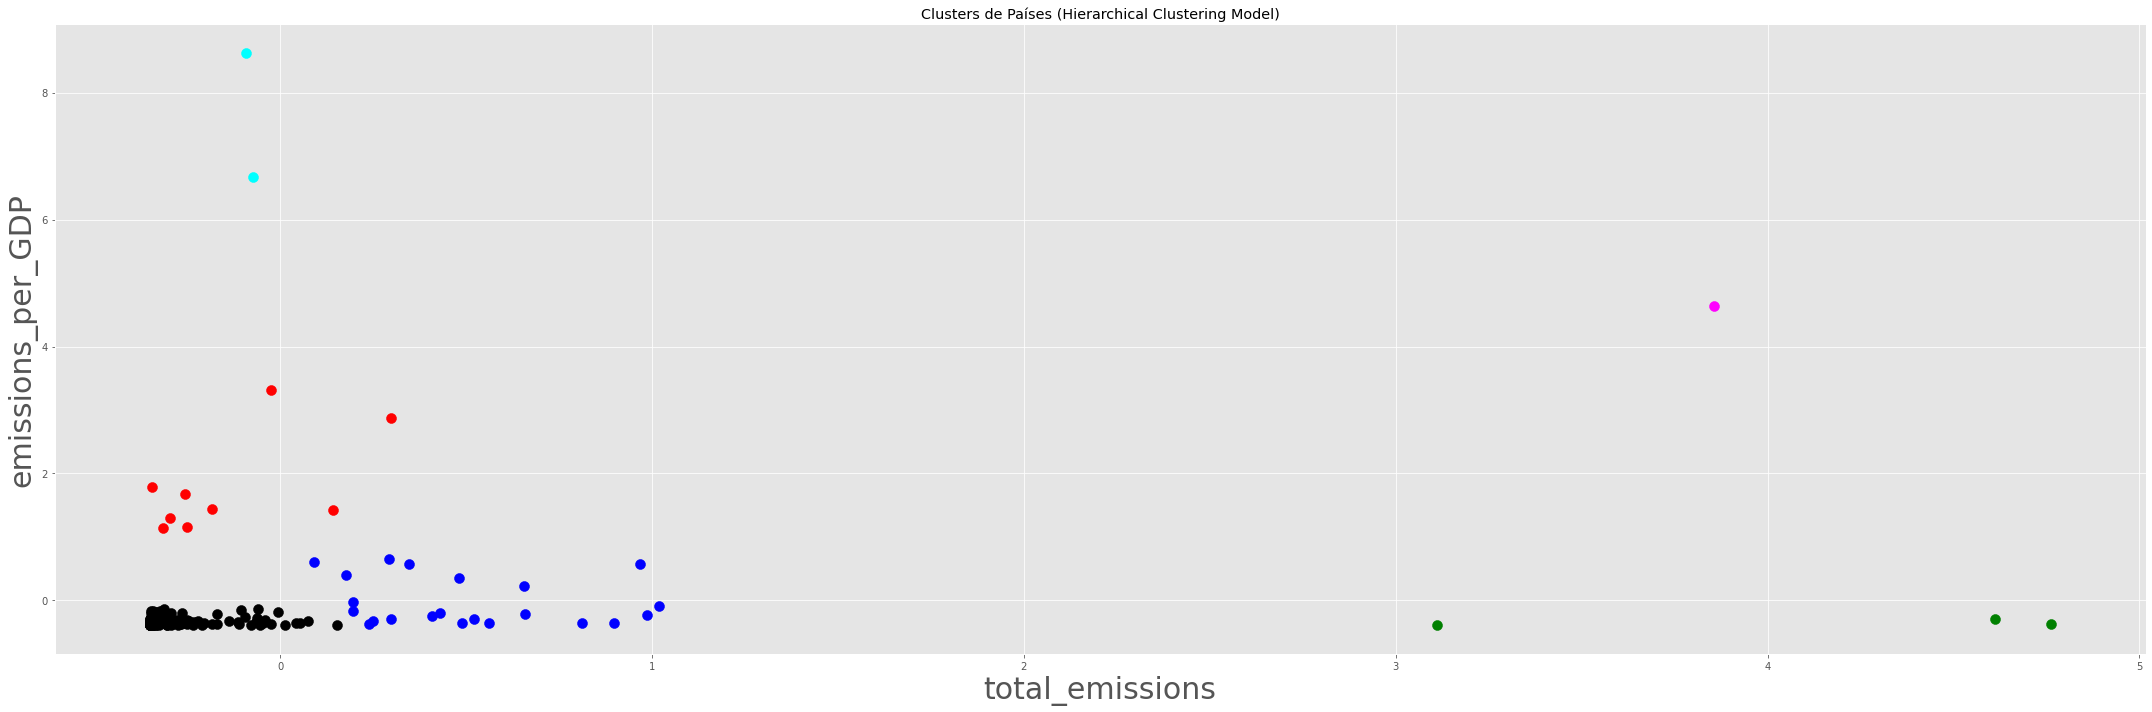

In [135]:
#Visualizing clusters
plt.scatter(X[y_ac==0, 0], X[y_ac==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_ac==1, 0], X[y_ac==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_ac==2, 0], X[y_ac==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_ac==3, 0], X[y_ac==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_ac==4, 0], X[y_ac==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(X[y_ac==5, 0], X[y_ac==5, 1], s=100, c='black', label ='Cluster 6')
#plt.scatter(X[y_ac==6, 0], X[y_ac==6, 1], s=100, c='orange', label ='Cluster 7')
#plt.scatter(X[y_ac==7, 0], X[y_ac==7, 1], s=100, c='white', label ='Cluster 8')
plt.title('Clusters de Países (Hierarchical Clustering Model)')
plt.xlabel('total_emissions', fontsize=30)
plt.ylabel("emissions_per_GDP", fontsize=30)

plt.savefig('plot33')

plt.show()

### "total_emissions" and "emissions_per_GDP_mundial"

In [136]:
#scaled_df

X = scaled_df.loc[:, ["total_emissions","emissions_per_GDP_mundial"]].values

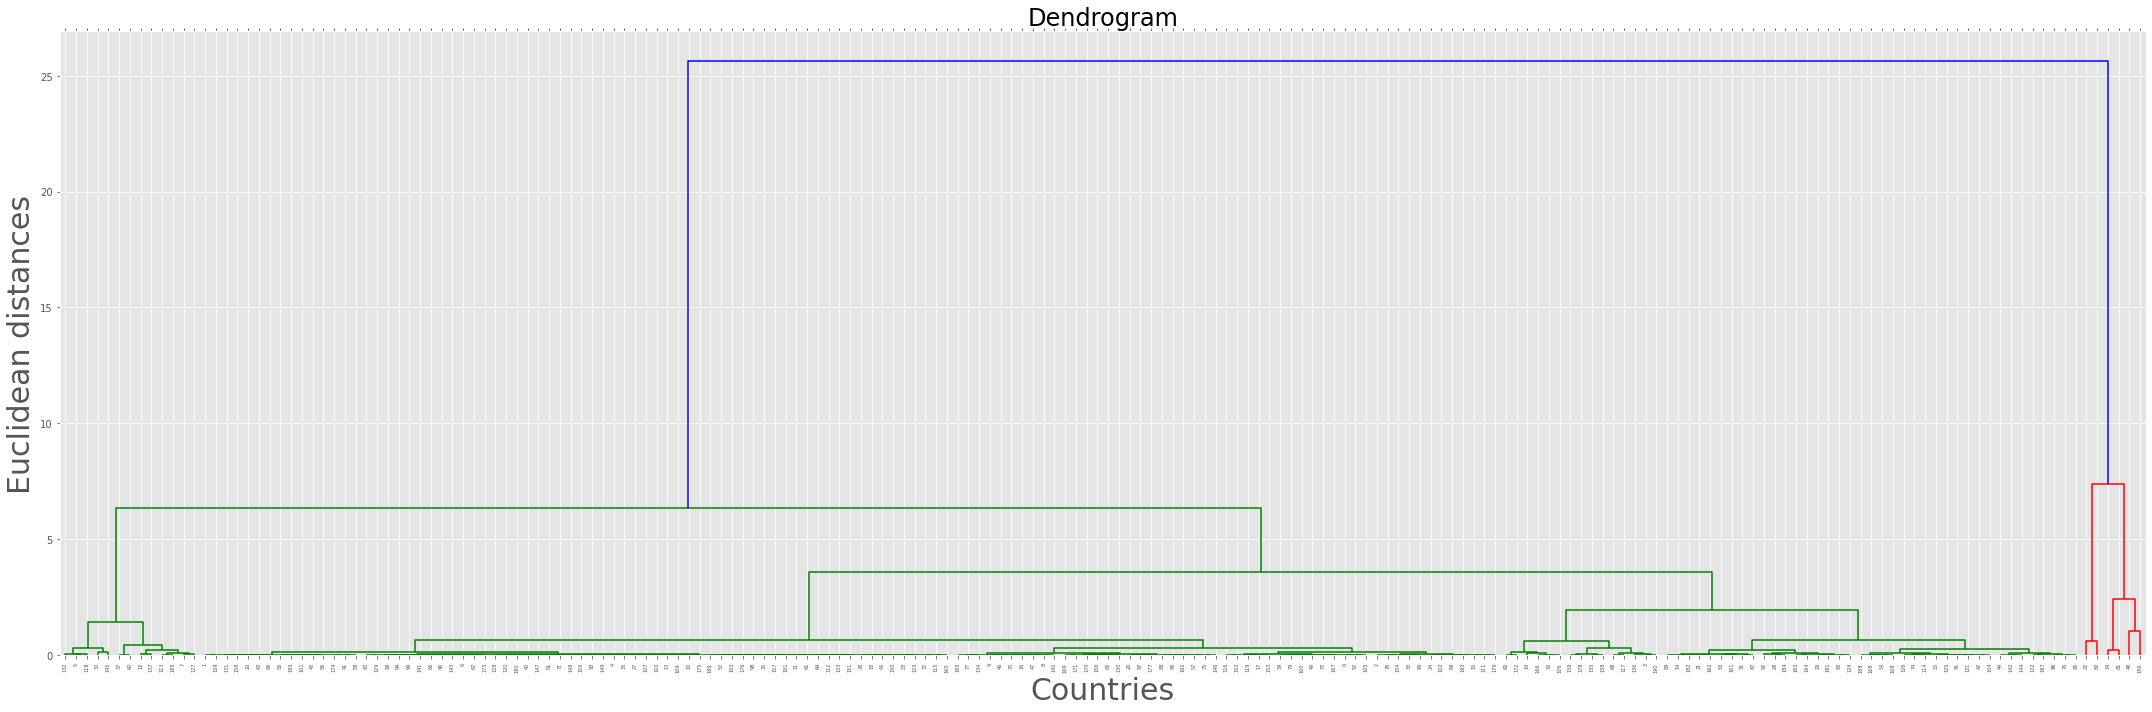

In [137]:
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.rcParams["figure.figsize"] = [30, 10]
plt.rcParams["figure.autolayout"] = True
plt.title('Dendrogram', fontsize=24)
plt.xlabel('Countries', fontsize=30)
plt.ylabel('Euclidean distances', fontsize=30)
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')

plt.savefig('plot42')

plt.show()





In [138]:

# There are two algorithms for hierarchical clustering: #Agglomerative Hierarchical Clustering and 
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our algorithm class
ac = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')

In [139]:
# Lets try to fit the hierarchical clustering algorithm  to dataset #X while creating the clusters vector that tells for each customer #which cluster the customer belongs to.
y_ac=ac.fit_predict(X)

In [140]:
print(ac.labels_)

[4 4 4 1 4 3 4 3 4 4 4 4 3 4 1 4 4 4 4 1 4 1 2 4 4 1 4 4 1 1 3 1 1 4 0 4 4
 3 4 4 4 4 1 4 1 4 4 4 0 4 4 4 4 1 1 4 4 4 4 4 3 4 1 4 4 4 4 4 1 4 4 4 4 4
 1 4 1 4 4 4 4 0 2 1 4 1 4 1 4 1 4 1 1 4 4 4 1 4 4 4 4 4 4 4 1 4 1 4 1 4 4
 4 4 3 1 4 4 1 3 4 4 1 1 4 1 1 1 3 4 4 4 4 3 4 4 1 1 3 1 1 4 4 1 4 1 3 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 4 1 4 1 4 4 4 1 4 4 4 4 4 1 4 4 1 1 4 1
 3 0 1 1 4 1 4 4 4]


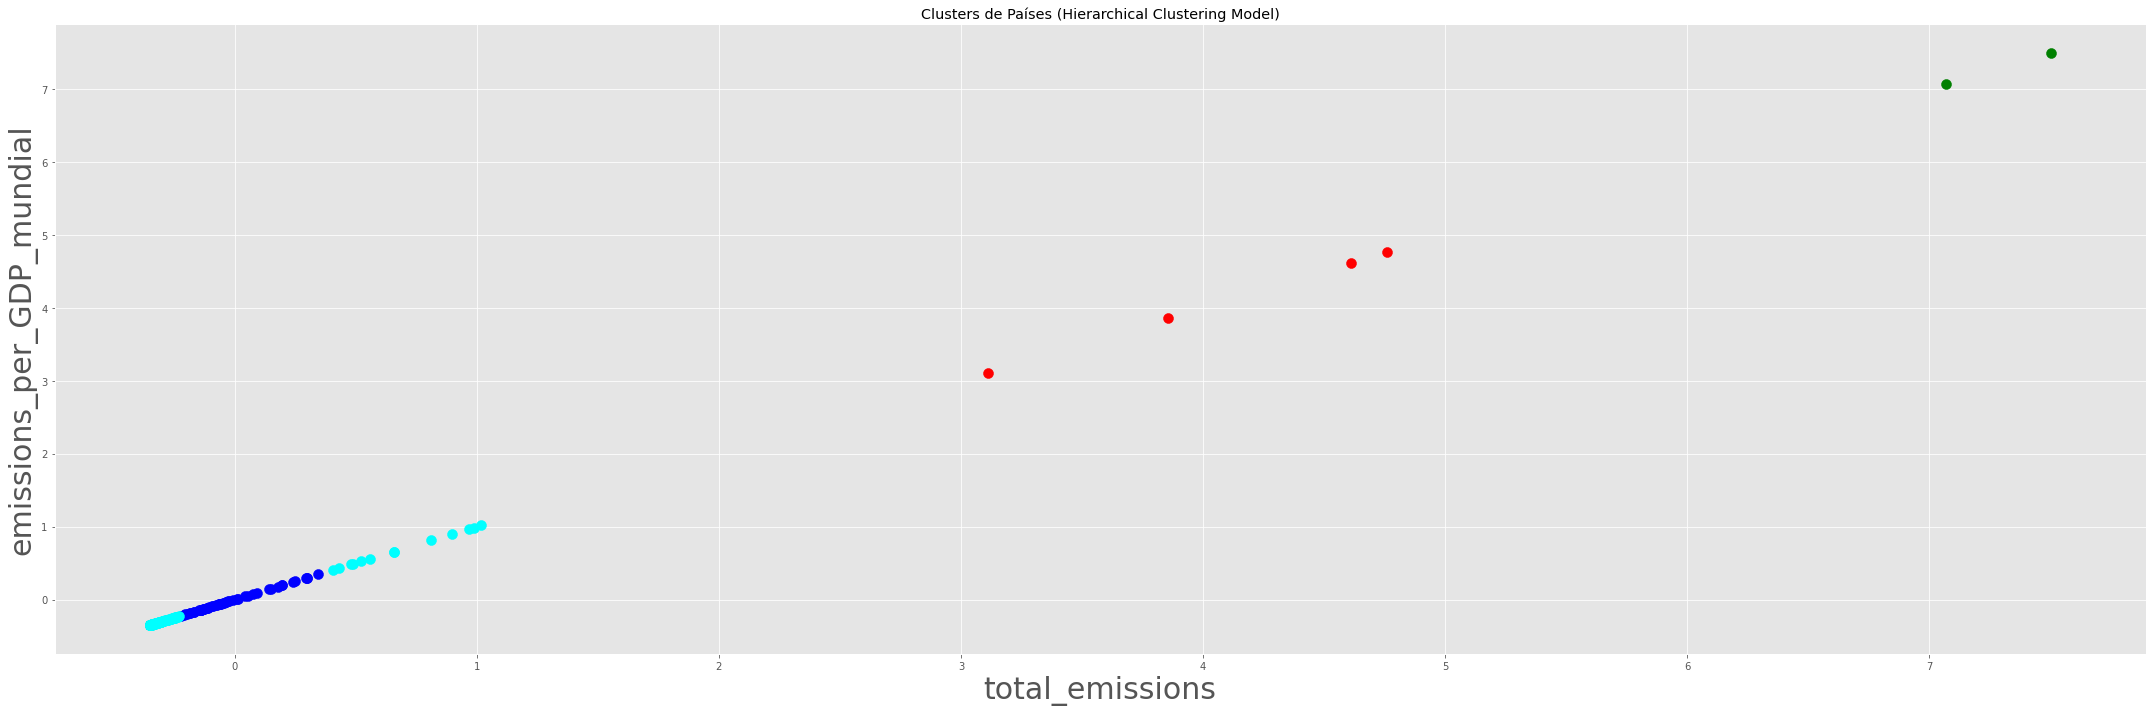

In [141]:
#Visualizing clusters
plt.scatter(X[y_ac==0, 0], X[y_ac==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_ac==1, 0], X[y_ac==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_ac==2, 0], X[y_ac==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_ac==3, 0], X[y_ac==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_ac==4, 0], X[y_ac==4, 1], s=100, c='cyan', label ='Cluster 5')
plt.scatter(X[y_ac==5, 0], X[y_ac==5, 1], s=100, c='black', label ='Cluster 6')
plt.scatter(X[y_ac==6, 0], X[y_ac==6, 1], s=100, c='orange', label ='Cluster 7')
plt.scatter(X[y_ac==7, 0], X[y_ac==7, 1], s=100, c='white', label ='Cluster 8')
plt.title('Clusters de Países (Hierarchical Clustering Model)')
plt.xlabel('total_emissions', fontsize=30)
plt.ylabel("emissions_per_GDP_mundial", fontsize=30)
plt.savefig('plot44') 
plt.show()

### "emissions_per_capita" and "GDP19_per_capita", with outliers.

In [142]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, Afghanistan to Zimbabwe
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   index                                   194 non-null    float64
 1   total_emissions                         194 non-null    float64
 2   total_population                        194 non-null    float64
 3   %_population                            194 non-null    float64
 4   GDP_2019                                194 non-null    float64
 5   %_GDP_2019                              194 non-null    float64
 6   %_emissions                             194 non-null    float64
 7   emissions_per_capita                    194 non-null    float64
 8   emissions_per_capita_mundial            194 non-null    float64
 9   GDP19_per_capita                        194 non-null    float64
 10  GDP19_per_capita_mundial                194 non-null

In [143]:
#scaled_df

X = scaled_df_capita.loc[:, ["emissions_per_capita","GDP19_per_capita"]].values

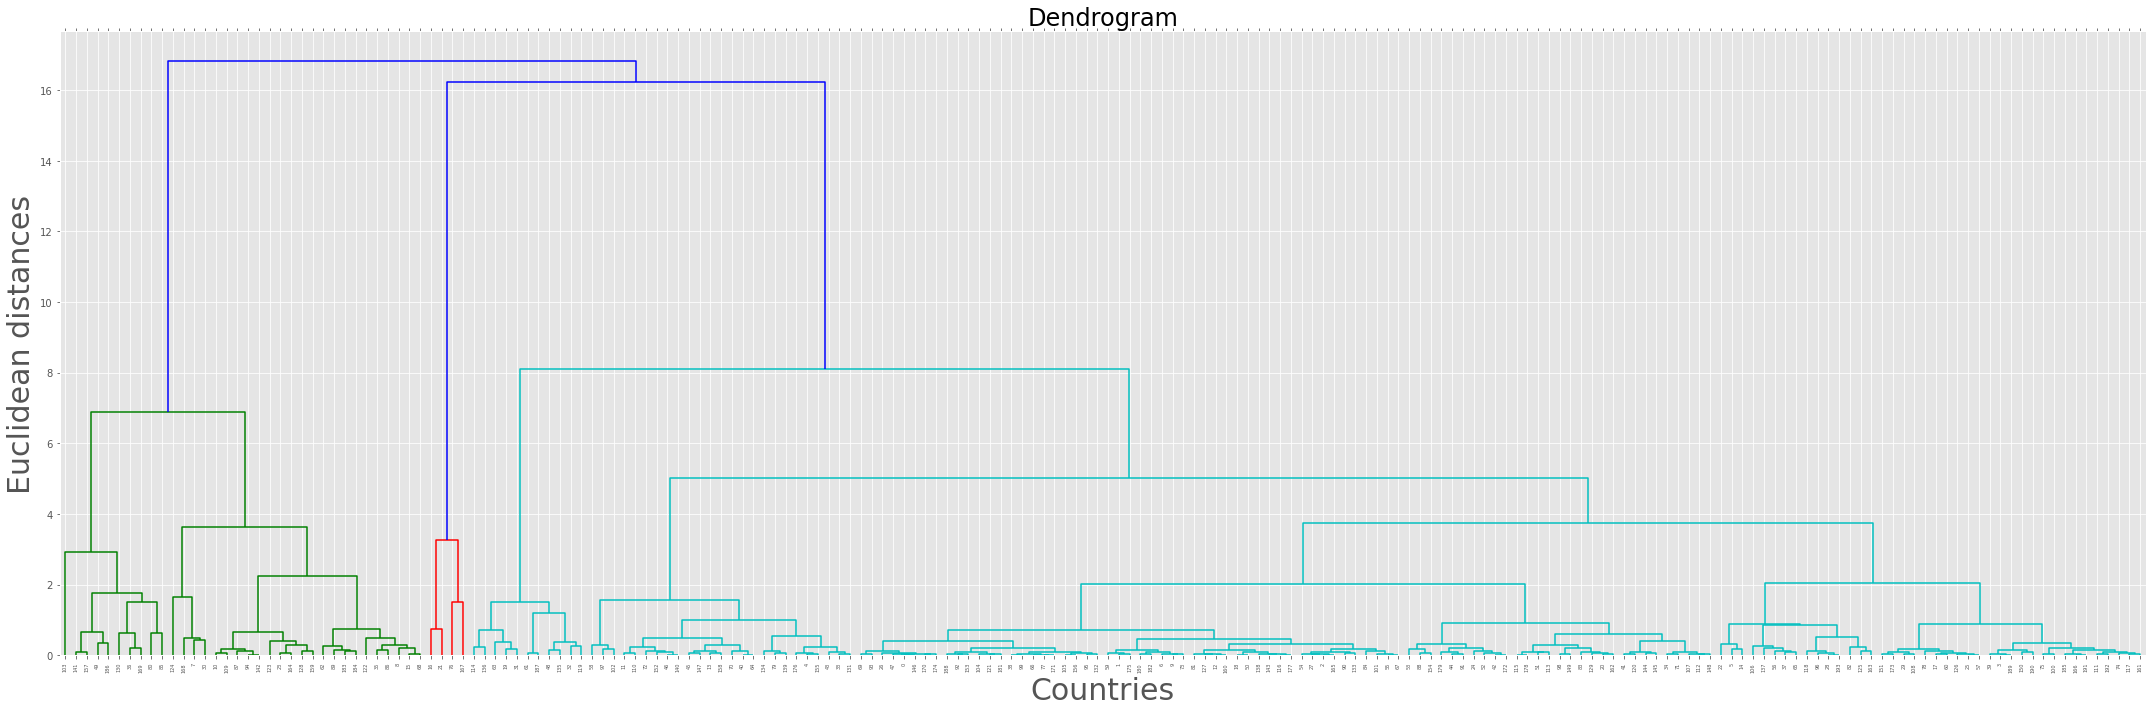

In [144]:
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.rcParams["figure.figsize"] = [30, 10]
plt.rcParams["figure.autolayout"] = True
plt.title('Dendrogram', fontsize=24)
plt.xlabel('Countries', fontsize=30)
plt.ylabel('Euclidean distances', fontsize=30)
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')

plt.savefig('plot52')

plt.show()





In [145]:

# There are two algorithms for hierarchical clustering: #Agglomerative Hierarchical Clustering and 
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our algorithm class
ac = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward')

In [146]:
# Lets try to fit the hierarchical clustering algorithm  to dataset #X while creating the clusters vector that tells for each customer #which cluster the customer belongs to.
y_ac=ac.fit_predict(X)

In [147]:
print(ac.labels_)

[0 0 0 0 5 0 0 1 1 0 1 5 0 5 0 1 2 0 0 3 0 2 0 1 0 0 0 0 0 0 1 3 3 5 0 1 4
 0 0 0 5 0 0 5 0 5 5 0 3 4 0 0 0 0 0 0 0 0 5 0 0 3 1 3 5 0 0 0 1 0 5 0 5 0
 0 0 2 0 0 5 4 0 0 0 0 4 1 1 0 1 0 0 0 0 1 0 0 5 0 0 0 0 5 4 0 0 0 0 0 1 5
 0 0 0 3 0 0 0 0 3 0 0 1 1 1 0 0 0 1 0 4 5 0 0 5 3 3 0 0 5 5 4 1 0 0 0 0 5
 0 0 0 0 5 0 0 5 0 4 5 1 0 0 0 0 1 0 0 2 1 4 0 0 0 0 0 0 5 0 0 0 0 0 0 1 1
 0 4 3 0 0 0 0 0 0]


TypeError: ignored

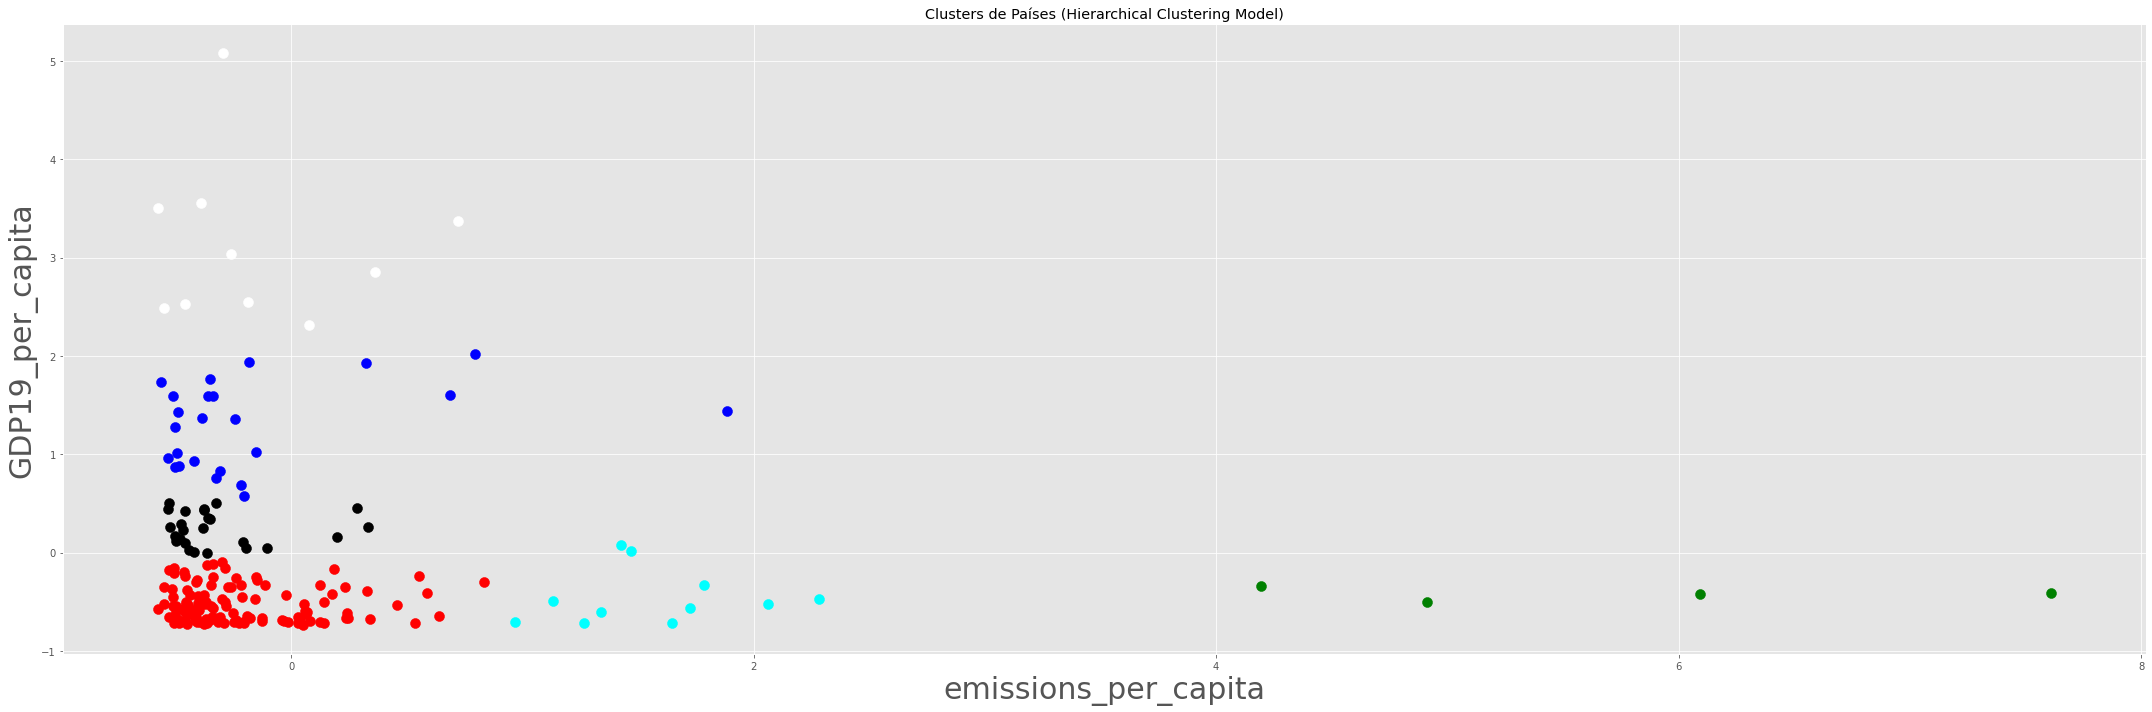

In [159]:
#Visualizing clusters
plt.scatter(X[y_ac==0, 0], X[y_ac==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_ac==1, 0], X[y_ac==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_ac==2, 0], X[y_ac==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_ac==3, 0], X[y_ac==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_ac==4, 0], X[y_ac==4, 1], s=100, c='white', label ='Cluster 5')
plt.scatter(X[y_ac==5, 0], X[y_ac==5, 1], s=100, c='black', label ='Cluster 6')
#plt.scatter(X[y_ac==6, 0], X[y_ac==6, 1], s=100, c='orange', label ='Cluster 7')
#plt.scatter(X[y_ac==7, 0], X[y_ac==7, 1], s=100, c='yellow', label ='Cluster 8')
plt.title('Clusters de Países (Hierarchical Clustering Model)')
plt.xlabel('emissions_per_capita', fontsize=30)
plt.ylabel("GDP19_per_capita", fontsize=30)
"""for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))plt.text(x=df.G[i]+0.3,y=df.GA[i]+0.3,s=df.Team[i], 
          fontdict=dict(color=’red’,size=10),
          bbox=dict(facecolor=’yellow’,alpha=0.5))"""
plt.savefig('plot54') 
plt.show()

### "emissions_per_capita" and "production_per_capita", with outliers. 

In [ ]:
scaled_df.info()

In [ ]:
#scaled_df

X = scaled_df.loc[:, ["emissions_per_capita","production_per_capita"]].values

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.rcParams["figure.figsize"] = [30, 10]
plt.rcParams["figure.autolayout"] = True
plt.title('Dendrogram', fontsize=24)
plt.xlabel('Countries', fontsize=30)
plt.ylabel('Euclidean distances', fontsize=30)
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')

plt.savefig('plot62')

plt.show()





In [ ]:

# There are two algorithms for hierarchical clustering: #Agglomerative Hierarchical Clustering and 
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our algorithm class
ac = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward')

In [ ]:
# Lets try to fit the hierarchical clustering algorithm  to dataset #X while creating the clusters vector that tells for each customer #which cluster the customer belongs to.
y_ac=ac.fit_predict(X)

In [ ]:
print(ac.labels_)

In [ ]:
#Visualizing clusters
plt.scatter(X[y_ac==0, 0], X[y_ac==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_ac==1, 0], X[y_ac==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_ac==2, 0], X[y_ac==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_ac==3, 0], X[y_ac==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_ac==4, 0], X[y_ac==4, 1], s=100, c='white', label ='Cluster 5')
plt.scatter(X[y_ac==5, 0], X[y_ac==5, 1], s=100, c='black', label ='Cluster 6')
plt.scatter(X[y_ac==6, 0], X[y_ac==6, 1], s=100, c='orange', label ='Cluster 7')
#plt.scatter(X[y_ac==7, 0], X[y_ac==7, 1], s=100, c='yellow', label ='Cluster 8')
plt.title('Clusters de Países (Hierarchical Clustering Model)')
plt.xlabel('emissions_per_capita', fontsize=30)
plt.ylabel("production_per_capita", fontsize=30)
plt.savefig('plot65') 
plt.show()

#  KMeans Fit


In [ ]:
scaled_df_capita.head()

In [ ]:
cluster_model = KMeans(n_clusters = 7)
cluster_model.fit(scaled_df_capita)

In [ ]:
labels = cluster_model.predict(scaled_df_capita)

In [ ]:
scaled_df_capita["cluster"] = labels

In [ ]:
scaled_df_capita.shape

In [ ]:
scaled_df_capita["cluster"].unique()

In [ ]:
scaled_df_capita.reset_index(inplace = True)

In [ ]:
scaled_df_capita.info()

In [ ]:
df = scaled_df_capita

In [ ]:
df.info()

In [ ]:
# Visualizing clusters according to a determined set of features.
selected_columns = ["emissions_per_capita", "GDP19_per_capita", "consumption_CO2emissions_per_capita"]#, "emissions_per_production", "production_per_capita"]  

sns.set_palette("colorblind") # "bright", "colorblind", "pastel", "muted", "dark"
sns.pairplot(df, vars = selected_columns, hue = 'cluster');




# Segmentation Emission Indicators





In [ ]:
df.info()

In [ ]:
# Calculating emissions indicators
QUANTILES = 5
#df['emissions'] = pd.qcut(df['%_emissions'], q = QUANTILES, labels = range(QUANTILES))
df['GDP_capita'] = pd.qcut(df['GDP19_per_capita'], q = QUANTILES, labels = range(QUANTILES))
df['emissions_capita'] = pd.qcut(df['emissions_per_capita'], q = QUANTILES, labels = range(QUANTILES))
df['consumption_CO2'] = pd.qcut(df['consumption_CO2emissions_per_capita'], q = QUANTILES, labels = range(QUANTILES))
#df['CO2 per unit energy'] = pd.qcut(df['CO2 per unit energy'], q = QUANTILES, labels = range(QUANTILES))


In [ ]:
df.pivot_table(index = 'GDP_capita', values = ['GDP19_per_capita'], aggfunc = [len, np.mean])

In [ ]:
df.pivot_table(index = 'emissions_capita', values = ['emissions_per_capita'], aggfunc = [len, np.mean])

In [ ]:
df.pivot_table(index = 'consumption_CO2', values = ['consumption_CO2emissions_per_capita'], aggfunc = [len, np.mean])

In [ ]:
df.info()

In [ ]:
df[["Country", "cluster", 'production_per_capita', "GDP_capita", 'emissions_per_capita', "consumption_CO2emissions_per_capita"]].\
groupby(["cluster", 'emissions_per_capita', 'GDP_capita', "consumption_CO2emissions_per_capita"]).agg('count')




# Clusters Summary Cards





In [ ]:
df.info()

In [ ]:
df["GDP_capita"] = df["GDP_capita"].astype(int)

In [ ]:
df["emissions_capita"] = df["emissions_capita"].astype(int)

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
ficha_df = pd.DataFrame()
ficha_df

In [ ]:
for i, col in enumerate([ "GDP19_per_capita", "production_per_capita", 
                         "emissions_per_capita", "consumption_CO2emissions_per_capita"]):
    resumen_data = df[["cluster", col]].groupby("cluster").describe().T[1:]
    ficha_df = ficha_df.append(resumen_data)

In [ ]:
resumen_data

In [ ]:
ficha_df

In [ ]:
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)

Get country names for each cluster

In [ ]:
df.head(1)

In [ ]:
df['cluster'].value_counts()

Cluster 1

In [ ]:
df[df['cluster'] == 0]['Country']

Cluster 2.

In [ ]:
df[df['cluster'] == 1]['Country']

Cluster 3

In [ ]:
df[df['cluster'] == 2]['Country']

Cluster 4

In [ ]:
df[df['cluster'] == 3]['Country']

Cluster 5

In [ ]:
df[df['cluster'] == 4]['Country'].to_list()

Cluster 6

In [ ]:
df[df['cluster'] == 5]['Country']

Cluster 7


In [ ]:
df[df['cluster'] == 6]['Country'].to_list()

Cluster 8


In [ ]:
df[df['cluster'] == 7]['Country'].to_list()

In [ ]:
df.sort_values("cluster")["Country"]